

# Project 2, House Prices: Advanced Regression Techniques

- Done by: Mona, Fatimah, Ghadah, Sara
---

## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualiation tools
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sci-kit learn tools
from scipy.stats import skew

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# ######## import os
# ######### print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

# ignoreing sklearn warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# import library for Standardrize feature scales 
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Show all commands written in one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.datasets import make_biclusters
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn import model_selection


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error

## Load Datasets

In [2]:
# load data

house_df_tr = pd.read_csv('train.csv')
house_df_ts = pd.read_csv('test.csv')
# merge the two datasets
house_df = pd.concat([house_df_tr, house_df_ts], axis = 0)


C:\Users\monai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Data Cleaning and EDA

The data should be clean by checking:
- incorrect values.
- duplications.
- missing values.
- dummified some features.
- translating some values into numeric.(ex: rating 'Excellent' ---> 5)

In [3]:
# display shape for train and test data
house_df_tr.shape
house_df_ts.shape

(1460, 81)

(1459, 80)

In [4]:
# disply tables' head for train and test data

house_df_tr.head()
house_df_ts.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# to display rows ,columns up to 999
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)


In [6]:
# check data types in each column

house_df_tr.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# check null values in trained data

house_df_tr.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
# check null values in test data

house_df_ts.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Filling up missing values

In [9]:
# replace blanks with 'NaN'

house_df_tr.replace('', np.NaN, inplace=True)
house_df_ts.replace('', np.NaN, inplace=True)

In [10]:
# LotFrontage values
house_df.LotFrontage.value_counts()


60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
88.0      22
67.0      22
69.0      20
35.0      19
56.0      19
71.0      19
44.0      19
84.0      18
81.0      18
58.0      17
61.0      17
34.0      16
40.0      16
48.0      16
95.0      15
110.0     15
92.0      15
77.0      15
86.0      15
91.0      14
41.0      14
120.0     14
96.0      14
83.0      13
93.0      13
42.0      12
94.0      12
98.0      12
105.0     12
107.0     11
30.0      11
87.0      11
54.0      10
45.0      10
89.0      10
102.0     10
32.0       8
47.0       8
36.0       8
37.0       7
39.0       6
103.0      6
99.0       6
108.0      6
104.0      5
114.0      5
49.0       5

In [11]:
# check Alley values

house_df_tr.Alley.value_counts()


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
# check Alley values

house_df_ts.Alley.value_counts()


Grvl    70
Pave    37
Name: Alley, dtype: int64

In [13]:
# fill Nan with N/A (not ablicable) based on the dictionary specification

house_df_tr.Alley.fillna ('N/A', inplace = True)
house_df_tr.Alley.value_counts()

N/A     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [14]:
# fill Nan with N/A (not ablicable) based on the dictionary specification

house_df_ts.Alley.fillna ('N/A', inplace = True)
house_df_ts.Alley.value_counts()

N/A     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [15]:
# check values in BsmtQual

house_df_tr.BsmtQual.value_counts()
house_df_ts.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [16]:
# fill Nulls in BsmtQual with No Basement based on the dictionary specification

house_df_tr.BsmtQual.fillna ('No Basement', inplace = True)
house_df_tr.BsmtQual.value_counts()
house_df_ts.BsmtQual.fillna ('No Basement', inplace = True)
house_df_ts.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

TA             634
Gd             591
Ex             137
Fa              53
No Basement     44
Name: BsmtQual, dtype: int64

In [17]:
# check values in BsmtCond

house_df_tr.BsmtCond.value_counts()
house_df_ts.BsmtCond.value_counts()


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [18]:
# fill Nulls in BsmtCond with No Basement based on the dictionary specification

house_df_tr.BsmtCond.fillna ('No Basement', inplace = True)
house_df_tr.BsmtCond.value_counts()
house_df_ts.BsmtCond.fillna ('No Basement', inplace = True)
house_df_ts.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

TA             1295
Fa               59
Gd               57
No Basement      45
Po                3
Name: BsmtCond, dtype: int64

In [19]:
# check values in BsmtExposure

house_df_tr.BsmtExposure.value_counts()
house_df_ts.BsmtExposure.value_counts()


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [20]:
# fill Nulls in BsmtExposure with No Basement based on the dictionary specification

house_df_tr.BsmtExposure.fillna ('No Basement', inplace = True)
house_df_tr.BsmtExposure.value_counts()
house_df_ts.BsmtExposure.fillna ('No Basement', inplace = True)
house_df_ts.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

No             951
Av             197
Gd             142
Mn             125
No Basement     44
Name: BsmtExposure, dtype: int64

In [21]:
# check values in BsmtFinType1

house_df_tr.BsmtFinType1.value_counts()
house_df_ts.BsmtFinType1.value_counts()


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [22]:
# fill Nulls in BsmtFinType1 with No Basement based on the dictionary specification

house_df_tr.BsmtFinType1.fillna ('No Basement', inplace = True)
house_df_tr.BsmtFinType1.value_counts()

house_df_ts.BsmtFinType1.fillna ('No Basement', inplace = True)
house_df_ts.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

GLQ            431
Unf            421
ALQ            209
Rec            155
BLQ            121
LwQ             80
No Basement     42
Name: BsmtFinType1, dtype: int64

In [23]:
# check values in BsmtFinType2

house_df_tr.BsmtFinType2.value_counts()

house_df_ts.BsmtFinType2.value_counts()


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [24]:
# fill Nulls in BsmtFinType2 with No Basement based on the dictionary specification

house_df_tr.BsmtFinType2.fillna ('No Basement', inplace = True)
house_df_tr.BsmtFinType2.value_counts()

house_df_ts.BsmtFinType2.fillna ('No Basement', inplace = True)
house_df_ts.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

Unf            1237
Rec              51
No Basement      42
LwQ              41
BLQ              35
ALQ              33
GLQ              20
Name: BsmtFinType2, dtype: int64

In [25]:
# check values in FireplaceQu

house_df_tr.FireplaceQu.value_counts()

house_df_ts.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [26]:
# fill Nulls in FireplaceQu with No Fire place based on the dictionary specification

house_df_tr.FireplaceQu.fillna ('No Fire Place', inplace = True)
house_df_tr.FireplaceQu.value_counts()

house_df_ts.FireplaceQu.fillna ('No Fire Place', inplace = True)
house_df_ts.FireplaceQu.value_counts()

No Fire Place    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

No Fire Place    730
Gd               364
TA               279
Fa                41
Po                26
Ex                19
Name: FireplaceQu, dtype: int64

In [27]:
# check values in GarageType

house_df_tr.GarageType.value_counts()
house_df_ts.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [28]:
# fill Nulls in GarageType with 'No Garage' place based on the dictionary specification

house_df_tr.GarageType.fillna ('No Garage', inplace = True)
house_df_tr.GarageType.value_counts()

house_df_ts.GarageType.fillna ('No Garage', inplace = True)
house_df_ts.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

Attchd       853
Detchd       392
BuiltIn       98
No Garage     76
Basment       17
2Types        17
CarPort        6
Name: GarageType, dtype: int64

In [29]:
# fill Nulls in GarageYrBlt with 'zeros' based on the dictionary specification

house_df_tr.GarageYrBlt.fillna (0, inplace = True)
house_df_tr.GarageYrBlt.value_counts()

house_df_ts.GarageYrBlt.fillna (0, inplace = True)
house_df_ts.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1962.0    21
2009.0    21
1966.0    21
1965.0    21
1958.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1974.0    18
1995.0    18
1994.0    18
1964.0    18
1959.0    17
1956.0    16
1990.0    16
1963.0    16
1979.0    15
1980.0    15
1967.0    15
1969.0    15
1973.0    14
1920.0    14
1988.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1989.0    10
1941.0    10
1925.0    10
1981.0    10
1991.0     9
1939.0     9
1975.0     9
1984.0     8
1930.0     8
1949.0     8
1983.0     7
1986.0     6
1926.0     6
1951.0     6
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1982.0     4
1931.0     4
1928.0     4
1935.0     4

0.0       78
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
2008.0    32
1977.0    31
2000.0    28
2002.0    27
1950.0    27
1993.0    27
1998.0    27
1997.0    25
1956.0    25
1999.0    24
1968.0    22
1978.0    22
2001.0    21
1967.0    21
1994.0    21
1958.0    21
1976.0    21
1979.0    20
1996.0    20
1930.0    19
1975.0    19
1959.0    19
1920.0    19
1966.0    18
1963.0    18
1954.0    18
1960.0    18
1961.0    18
1974.0    17
1964.0    17
1969.0    17
1980.0    17
1995.0    17
1973.0    15
1962.0    14
1992.0    14
1957.0    14
1952.0    13
1972.0    13
1965.0    13
1939.0    12
1970.0    12
1953.0    11
1951.0    11
1940.0    11
1955.0    11
1971.0    11
1984.0    11
1990.0    10
1989.0     9
1926.0     9
1938.0     8
1948.0     8
1991.0     8
2009.0     8
1985.0     8
1987.0     7
1910.0     7
1986.0     6
1945.0     6
1988.0     6
1949.0     6
1925.0     5
1946.0     5
1924.0     5
1982.0     5
1915.0     5
1981.0     5
1900.0     5
1941.0     4
1983.0     4

In [30]:
# check values in GarageFinish

house_df_tr.GarageFinish.value_counts()
house_df_ts.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [31]:
# fill Nulls in GarageFinish with 'No Garage' based on the dictionary specification

house_df_tr.GarageFinish.fillna ('No Garage', inplace = True)
house_df_tr.GarageFinish.value_counts()

house_df_ts.GarageFinish.fillna ('No Garage', inplace = True)
house_df_ts.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

Unf          625
RFn          389
Fin          367
No Garage     78
Name: GarageFinish, dtype: int64

In [32]:
# check values in GarageQual

house_df_tr.GarageQual.value_counts()
house_df_ts.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [33]:
# fill Nulls in GarageQual with 'No Garage' based on the dictionary specification

house_df_tr.GarageQual.fillna ('No Garage', inplace = True)
house_df_tr.GarageQual.value_counts()

house_df_ts.GarageQual.fillna ('No Garage', inplace = True)
house_df_ts.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

TA           1293
No Garage      78
Fa             76
Gd             10
Po              2
Name: GarageQual, dtype: int64

In [34]:
# check values in GarageCond

house_df_tr.GarageCond.value_counts()
house_df_ts.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [35]:
# fill Nulls in GarageCond with 'No Garage' based on the dictionary specification

house_df_tr.GarageCond.fillna ('No Garage', inplace = True)
house_df_tr.GarageCond.value_counts()

house_df_ts.GarageCond.fillna ('No Garage', inplace = True)
house_df_ts.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

TA           1328
No Garage      78
Fa             39
Po              7
Gd              6
Ex              1
Name: GarageCond, dtype: int64

In [36]:
# check values in PoolQC

house_df_tr.PoolQC.value_counts()
house_df_ts.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

Ex    2
Gd    1
Name: PoolQC, dtype: int64

In [37]:
# fill Nulls in PoolQC with 'No Pool' based on the dictionary specification

house_df_tr.PoolQC.fillna ('No Pool', inplace = True)
house_df_tr.PoolQC.value_counts()

house_df_ts.PoolQC.fillna ('No Pool', inplace = True)
house_df_ts.PoolQC.value_counts()

No Pool    1453
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

No Pool    1456
Ex            2
Gd            1
Name: PoolQC, dtype: int64

In [38]:
# check values in Fence

house_df_tr.Fence.value_counts()

house_df_ts.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [39]:
# fill Nulls in Fence with 'No Fence' based on the dictionary specification

house_df_tr.Fence.fillna ('No Fence', inplace = True)
house_df_tr.Fence.value_counts()

house_df_ts.Fence.fillna ('No Fence', inplace = True)
house_df_ts.Fence.value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

No Fence    1169
MnPrv        172
GdPrv         59
GdWo          58
MnWw           1
Name: Fence, dtype: int64

In [40]:
# check values in MiscFeature

house_df_tr.MiscFeature.value_counts()
house_df_ts.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [41]:
# fill Nulls in MiscFeature with 'No Features' based on the dictionary specification

house_df_tr.MiscFeature.fillna ('No Additional Features', inplace = True)
house_df_tr.MiscFeature.value_counts()

house_df_ts.MiscFeature.fillna ('No Additional Features', inplace = True)
house_df_ts.MiscFeature.value_counts()

No Additional Features    1406
Shed                        49
Othr                         2
Gar2                         2
TenC                         1
Name: MiscFeature, dtype: int64

No Additional Features    1408
Shed                        46
Gar2                         3
Othr                         2
Name: MiscFeature, dtype: int64

In [42]:
# check values in MasVnrType          
   
house_df_tr.MasVnrType.value_counts()

house_df_ts.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [43]:
# replace Gategory named 'None' with 'Other type' name

house_df_tr.MasVnrType.replace ({'None': 'Other type'}, inplace = True)

house_df_ts.MasVnrType.replace ({'None': 'Other type'}, inplace = True)

In [44]:
# fill Nulls in MasVnrType with 'N/A' based on the dictionary specification

house_df_tr.MasVnrType.fillna ('N/A', inplace = True)
house_df_tr.MasVnrType.value_counts()

house_df_ts.MasVnrType.fillna ('N/A', inplace = True)
house_df_ts.MasVnrType.value_counts()

Other type    864
BrkFace       445
Stone         128
BrkCmn         15
N/A             8
Name: MasVnrType, dtype: int64

Other type    878
BrkFace       434
Stone         121
N/A            16
BrkCmn         10
Name: MasVnrType, dtype: int64

In [45]:
# fill nulls in MasVnrArea with 0 if 'N/A'  because the area missed when the MasVnrtype is N/A 

house_df_tr.MasVnrArea.fillna (0, inplace = True)
house_df_tr.MasVnrArea.value_counts()

house_df_ts.MasVnrArea.fillna (0, inplace = True)
house_df_ts.MasVnrArea.value_counts()

0.0       869
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

0.0       892
176.0      10
144.0       9
120.0       8
216.0       8
200.0       7
128.0       6
504.0       6
302.0       6
198.0       6
196.0       5
140.0       5
203.0       5
260.0       5
210.0       5
60.0        5
256.0       5
164.0       5
23.0        4
16.0        4
112.0       4
178.0       4
40.0        4
194.0       4
174.0       4
420.0       4
143.0       4
306.0       4
50.0        4
186.0       4
150.0       4
340.0       4
242.0       4
88.0        4
20.0        4
240.0       4
180.0       4
232.0       4
44.0        4
190.0       3
172.0       3
300.0       3
108.0       3
76.0        3
68.0        3
72.0        3
52.0        3
248.0       3
145.0       3
126.0       3
456.0       3
90.0        3
182.0       3
162.0       3
32.0        3
513.0       3
130.0       3
80.0        3
96.0        3
264.0       3
270.0       3
132.0       3
280.0       3
252.0       3
170.0       3
98.0        3
14.0        3
450.0       3
206.0       3
246.0       2
84.0        2
218.0 

In [46]:
# check values in Electrical          
   
house_df_tr.Electrical.value_counts()

house_df_ts.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [47]:
# fill nulls in Electrical with 'SBrkr' becuse it is the standard

house_df_tr.Electrical.fillna ('SBrkr', inplace = True)
house_df_tr.Electrical.value_counts()

house_df_ts.Electrical.fillna ('SBrkr', inplace = True)
house_df_ts.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [48]:
# check nulls in train subset
house_df_tr.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [49]:
# check nulls in test subset
house_df_ts.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [50]:
# check values of mszoning groupby the classes to check the major class to fill the nulls

house_df_ts.groupby(['MSZoning'])[['MSSubClass']].count()
house_df_ts['MSZoning'].value_counts()
house_df_ts.MSZoning.fillna ('RL', inplace = True)
house_df_ts.MSZoning.value_counts()


,MSSubClass
MSZoning,
C (all),15
FV,74
RH,10
RL,1114
RM,242


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [51]:
# fill nulls in Utilities with 'AllPub' because it is the defult

house_df_ts.Utilities.fillna ('AllPub', inplace = True)
house_df_ts.Utilities.value_counts()


AllPub    1459
Name: Utilities, dtype: int64

In [52]:
# fill nulls with the major gategory in Exterior1st

house_df_ts.Exterior1st.value_counts()
house_df_ts.Exterior1st.fillna ('VinylSd', inplace = True)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [53]:
# fill nulls with the major gategory in Exterior2nd
house_df_ts.Exterior2nd.value_counts()
house_df_ts.Exterior2nd.fillna ('VinylSd', inplace = True)

house_df_ts.Exterior2nd.value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [54]:
# fill nulls in:
# BsmtFinSF1         
# BsmtFinType2       
# BsmtFinSF2         
# BsmtUnfSF          
# TotalBsmtSF        
# BsmtFullBath
# BsmtHalfBath

house_df_ts[(house_df_ts['BsmtFinType1'].str.contains('No')) | (house_df_ts['BsmtFinType2'].str.contains('No'))]
house_df_ts.BsmtFinSF1.fillna (0, inplace = True)
house_df_ts.BsmtFinSF2.fillna (0, inplace = True)
house_df_ts.BsmtUnfSF.fillna (0, inplace = True)
house_df_ts.TotalBsmtSF.fillna (0, inplace = True)
house_df_ts.BsmtFullBath.fillna (0, inplace = True)
house_df_ts.BsmtHalfBath.fillna (0, inplace = True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
125,1586,30,RL,67.0,8777,Pave,N/A,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,Other type,0.0,TA,Gd,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,No Fire Place,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,No Pool,No Fence,No Additional Features,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,Other type,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,No Fire Place,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage,Y,0,0,0,0,0,0,No Pool,No Fence,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,Other type,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,No Additional Features,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,No Fire Place,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,No Pool,MnPrv,No Additional Features,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,N/A,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,Other type,0.0,TA,Gd,BrkTil,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,No Fire Place,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,No Pool,No Fence,No Additional Features,0,10,2009,WD,Normal
387,1848,20,RL,NaN,9000,Pave,N/A,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,Other type,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,No Fire Place,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage,N,0,0,100,0,0,0,No Pool,No Fence,No Additional Features,0,6,2009,WD,Normal
388,1849,20,RL,NaN,15635,Pave,N/A,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,Other type,0.0,TA,TA,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,No Fire Place,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,No Pool,No Fence,No Additional Features,0,10,2009,WD,Normal
396,1857,70,RL,120.0,26400,Pave,N/A,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,Other type,0.0,Gd,TA,PConc,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,

In [55]:
# fill nulls in KitchenQual

#check majoraty
house_df_ts.KitchenQual.value_counts()

house_df_ts.KitchenQual.fillna ('TA', inplace = True)


TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [56]:
# check nulls in:

# GarageType         
# GarageYrBlt        
# GarageFinish       
# GarageCars         
# GarageArea         
# GarageQual         
# GarageCond         

house_df_ts[(house_df_ts['GarageType']== 'No Garage') | (house_df_ts['GarageFinish']== 'No Garage') ][['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish']]


,GarageCars,GarageArea,GarageQual,GarageCond,GarageType,GarageYrBlt,GarageFinish
53,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
71,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
79,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
92,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
96,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
98,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
100,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
130,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
133,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage
134,0.0,0.0,No Garage,No Garage,No Garage,0.0,No Garage


In [57]:
# fill nulls in:
# GarageCars         
# GarageArea 
house_df_ts.GarageArea.fillna (0, inplace = True)
house_df_ts.GarageCars.fillna (0, inplace = True)

In [58]:
# fill nulls in SaleType

#check majoraty
house_df_ts.SaleType.value_counts()

house_df_ts.SaleType.fillna ('WD', inplace = True)


WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [59]:
# fill nulls in Functional column

#check majoraty
house_df_ts.Functional.value_counts()

house_df_ts.Functional.fillna ('Typ', inplace = True)


Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [60]:
# check nulls agian in test subset
house_df_ts.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [61]:
# check duplicates in columns

house_df_tr[['Condition1', 'Condition2']]
house_df_ts[['Condition1', 'Condition2']]


,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
5,Norm,Norm
6,Norm,Norm
7,PosN,Norm
8,Artery,Norm
9,Artery,Artery


,Condition1,Condition2
0,Feedr,Norm
1,Norm,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
5,Norm,Norm
6,Norm,Norm
7,Norm,Norm
8,Norm,Norm
9,Norm,Norm


In [62]:
# check duplicates in columns

house_df_tr[['Exterior1st', 'Exterior2nd']]
house_df_ts[['Exterior1st', 'Exterior2nd']]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
5,VinylSd,VinylSd
6,VinylSd,VinylSd
7,HdBoard,HdBoard
8,BrkFace,Wd Shng
9,MetalSd,MetalSd


,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,Wd Sdng,Wd Sdng
2,VinylSd,VinylSd
3,VinylSd,VinylSd
4,HdBoard,HdBoard
5,HdBoard,HdBoard
6,HdBoard,HdBoard
7,VinylSd,VinylSd
8,HdBoard,HdBoard
9,Plywood,Plywood


In [63]:
# check incorrect values in columns
# FireplaceQu         
# Fireplaces          
house_df_tr[['FireplaceQu', 'Fireplaces' ]][(house_df_tr['FireplaceQu'].str.contains ('No')) & (house_df_tr['Fireplaces'] != 0)]
house_df_tr[['FireplaceQu', 'Fireplaces' ]][(~(house_df_tr['FireplaceQu'].str.contains ('No'))) & (house_df_tr['Fireplaces'] == 0)]

house_df_ts[['FireplaceQu', 'Fireplaces' ]][(house_df_ts['FireplaceQu'].str.contains ('No')) & (house_df_ts['Fireplaces'] != 0)]
house_df_ts[['FireplaceQu', 'Fireplaces' ]][(~(house_df_ts['FireplaceQu'].str.contains ('No'))) & (house_df_ts['Fireplaces'] == 0)]

,FireplaceQu,Fireplaces


,FireplaceQu,Fireplaces


,FireplaceQu,Fireplaces


,FireplaceQu,Fireplaces


In [64]:
# check errors in columns

# GarageCond        
# GarageFinish      
# GarageQual        
# GarageType
# GarageYrBlt

house_df_tr[['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageArea', 'GarageYrBlt' ]][(house_df_tr['GarageType'].str.contains ('No')) & (house_df_tr['GarageArea'] != 0)]
house_df_tr[['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageArea', 'GarageYrBlt' ]][(~(house_df_tr['GarageType'].str.contains ('No'))) & (house_df_tr['GarageArea'] == 0)]

house_df_ts[['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageArea', 'GarageYrBlt' ]][(house_df_ts['GarageType'].str.contains ('No')) & (house_df_ts['GarageArea'] != 0)]
house_df_ts[['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageArea', 'GarageYrBlt' ]][(~(house_df_ts['GarageType'].str.contains ('No'))) & (house_df_ts['GarageArea'] == 0)]

list(house_df_ts.columns).index('GarageType')
house_df_ts.iloc[1116, 58] = 'No Garage'


,GarageCond,GarageFinish,GarageQual,GarageType,GarageArea,GarageYrBlt


,GarageCond,GarageFinish,GarageQual,GarageType,GarageArea,GarageYrBlt


,GarageCond,GarageFinish,GarageQual,GarageType,GarageArea,GarageYrBlt


,GarageCond,GarageFinish,GarageQual,GarageType,GarageArea,GarageYrBlt
1116,No Garage,No Garage,No Garage,Detchd,0.0,0.0


58

In [65]:
# check incorrect values in columns

# KitchenAbvGr        
# KitchenQual         

house_df_tr[['KitchenAbvGr', 'KitchenQual' ]][(house_df_tr['KitchenAbvGr'] == 0)]

house_df_ts[['KitchenAbvGr', 'KitchenQual' ]][(house_df_ts['KitchenAbvGr'] == 0)]

index_tr = list(house_df_tr.columns).index('KitchenQual')
index_ts = list(house_df_ts.columns).index('KitchenQual')

index_tr
index_ts

# fill incorrect values with 'No Kithchen'
house_df_tr.iloc[954, 53] = 'No Kithchen'
house_df_ts.iloc[1127, 53] = 'No Kithchen'
house_df_ts.iloc[1399, 53] = 'No Kithchen'


,KitchenAbvGr,KitchenQual
954,0,TA


,KitchenAbvGr,KitchenQual
1127,0,TA
1399,0,TA


53

53

In [66]:
# check incorrect values in columns

# MasVnrArea          
# MasVnrType          

house_df_tr[['MasVnrArea', 'MasVnrType']][(house_df_tr['MasVnrArea'] == 0) & ~(house_df_tr['MasVnrType'].str.contains('Other type'))]

house_df_ts[['MasVnrArea', 'MasVnrType']][(house_df_ts['MasVnrArea'] == 0) & ~(house_df_ts['MasVnrType'].str.contains('Other type'))]



,MasVnrArea,MasVnrType
234,0.0,N/A
529,0.0,N/A
650,0.0,N/A
688,0.0,BrkFace
936,0.0,N/A
973,0.0,N/A
977,0.0,N/A
1241,0.0,Stone
1243,0.0,N/A
1278,0.0,N/A


,MasVnrArea,MasVnrType
231,0.0,N/A
246,0.0,N/A
422,0.0,N/A
532,0.0,N/A
544,0.0,N/A
581,0.0,N/A
851,0.0,N/A
859,0.0,BrkFace
865,0.0,N/A
880,0.0,N/A


In [67]:
# check types in MasVnrType to make sure about the value of BrkFace, Stone    
house_df_tr.MasVnrType.value_counts()
house_df_ts.MasVnrType.value_counts()

Other type    864
BrkFace       445
Stone         128
BrkCmn         15
N/A             8
Name: MasVnrType, dtype: int64

Other type    878
BrkFace       434
Stone         121
N/A            16
BrkCmn         10
Name: MasVnrType, dtype: int64

In [68]:
# replace BrkFace with other in case of area = 0
index_tr = list(house_df_tr.columns).index('MasVnrType')
index_ts = list(house_df_ts.columns).index('MasVnrType')


house_df_tr.iloc[688, index_tr] = 'N/A'
house_df_tr.iloc[1241, index_tr] = 'N/A'
house_df_ts.iloc[859, index_ts] = 'N/A'


In [69]:
# check errors in columns

# MiscFeature         
# MiscVal             
# MoSold        

house_df_tr[['MiscFeature', 'MiscVal', 'MoSold']][((house_df_tr['MiscVal'] != 0) & (house_df_tr['MiscFeature'].str.contains('No')))]
house_df_tr[['MiscFeature', 'MiscVal', 'MoSold']][((house_df_tr['MiscVal'] == 0) & ~(house_df_tr['MiscFeature'].str.contains('No')))]

house_df_ts[['MiscFeature', 'MiscVal', 'MoSold']][((house_df_ts['MiscVal'] != 0) & (house_df_ts['MiscFeature'].str.contains('No')))]
house_df_ts[['MiscFeature', 'MiscVal', 'MoSold']][((house_df_ts['MiscVal'] == 0) & ~(house_df_ts['MiscFeature'].str.contains('No')))]


,MiscFeature,MiscVal,MoSold


,MiscFeature,MiscVal,MoSold
873,Othr,0,9
1200,Shed,0,7


,MiscFeature,MiscVal,MoSold
1089,No Additional Features,17000,10


,MiscFeature,MiscVal,MoSold
971,Shed,0,7


In [70]:
# drop wrong values in train set

house_df_tr = house_df_tr[~((house_df_tr['MiscVal'] != 0) & (house_df_tr['MiscFeature'].str.contains('No')))]
house_df_tr = house_df_tr[~((house_df_tr['MiscVal'] == 0) & ~(house_df_tr['MiscFeature'].str.contains('No')))]

house_df_tr.shape

(1458, 81)

In [71]:
# replace incorrect values in case of no features or MiscVal = 0

index_ts1 = list(house_df_ts.columns).index('MiscVal')
index_ts2 = list(house_df_ts.columns).index('MoSold')

# fill misval and mosold with zero when no features
house_df_ts.iloc[1089, index_ts1] = 0
house_df_ts.iloc[1089, index_ts2] = 0

# fill mosold with zero and when no features
house_df_ts.groupby(['MiscFeature', 'MiscVal'])['MiscVal'].agg(pd.Series.mode).to_frame()

house_df_ts.iloc[971, index_ts1] = 450



MiscVal
MiscFeature            MiscVal         
Gar2                   3000        3000
                       4500        4500
                       12500      12500
No Additional Features 0              0
Othr                   3000        3000
                       6500        6500
Shed                   0              0
                       80            80
                       300          300
                       400          400
                       420          420
                       450          450
                       455          455
                       460          460
                       490          490
                       500          500
                       600          600
                       650          650
                       700          700
                       750          750
                       900          900
                       1000        1000
                       1200        1200
                       1500        1500
                       1512        1512
                       2000        2000
                       2500        2500
                       4500        4500

In [72]:
# check errors in columns

# PoolArea  
# PoolQC                     

house_df_tr[['PoolArea', 'PoolQC']][((house_df_tr['PoolArea'] != 0) & (house_df_tr['PoolQC'].str.contains('No')))]
house_df_tr[['PoolArea', 'PoolQC']][((house_df_tr['PoolArea'] == 0) & ~(house_df_tr['PoolQC'].str.contains('No')))]


house_df_ts[['PoolArea', 'PoolQC']][((house_df_ts['PoolArea'] != 0) & (house_df_ts['PoolQC'].str.contains('No')))]
house_df_ts[['PoolArea', 'PoolQC']][((house_df_ts['PoolArea'] == 0) & ~(house_df_ts['PoolQC'].str.contains('No')))]


,PoolArea,PoolQC


,PoolArea,PoolQC


,PoolArea,PoolQC
960,368,No Pool
1043,444,No Pool
1139,561,No Pool


,PoolArea,PoolQC


In [73]:
# replace wrong values in case of no features or MiscVal = 0
index_ts1 = list(house_df_ts.columns).index('PoolArea')

# fill misval and mosold with zero when no features
house_df_ts.iloc[960, index_ts1] = 0
house_df_ts.iloc[1043, index_ts1] = 0
house_df_ts.iloc[1139, index_ts1] = 0


In [74]:
# check incorrect values in columns
# YearBuilt           
# YearRemodAdd        
# YrSold                    

house_df_tr[['YearBuilt', 'YearRemodAdd', 'YrSold']][((house_df_tr['YearRemodAdd'] < house_df_tr['YearBuilt']) | (house_df_tr['YrSold'] < house_df_tr['YearBuilt']) | (house_df_tr['YrSold'] < house_df_tr['YearRemodAdd']))]

house_df_ts[['YearBuilt', 'YearRemodAdd', 'YrSold']][((house_df_ts['YearRemodAdd'] < house_df_ts['YearBuilt']) | (house_df_ts['YrSold'] < house_df_ts['YearBuilt']) | (house_df_ts['YrSold'] < house_df_ts['YearRemodAdd']))]



,YearBuilt,YearRemodAdd,YrSold
523,2007,2008,2007


,YearBuilt,YearRemodAdd,YrSold
416,2002,2001,2009
835,2007,2008,2007
1089,2008,2009,2007


In [75]:
# replace incorrect values in case of no features or MiscVal = 0

index_tr = list(house_df_ts.columns).index('YearRemodAdd')
index_ts1 = list(house_df_ts.columns).index('YearRemodAdd')
index_ts2 = list(house_df_ts.columns).index('YrSold')

# fill YearRemodAdd with the value of the built year when YrSold >YearRemodAdd
house_df_ts.iloc[523, index_tr] = 2007

# fill YearRemodAdd with the value of the built year when YearRemodAdd < YearBuilt
house_df_ts.iloc[416, index_ts1] = 2002

# fill YearRemodAdd with the value of the built year when YrSold < YearRemodAdd
house_df_ts.iloc[835, index_ts1] = 2007

# fill YrSold with the value of the YearRemodAdd year when YrSold < YearRemodAdd and YrSold < YearBuilt
house_df_ts.iloc[1089, index_ts2] = 2009


C:\Users\monai\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


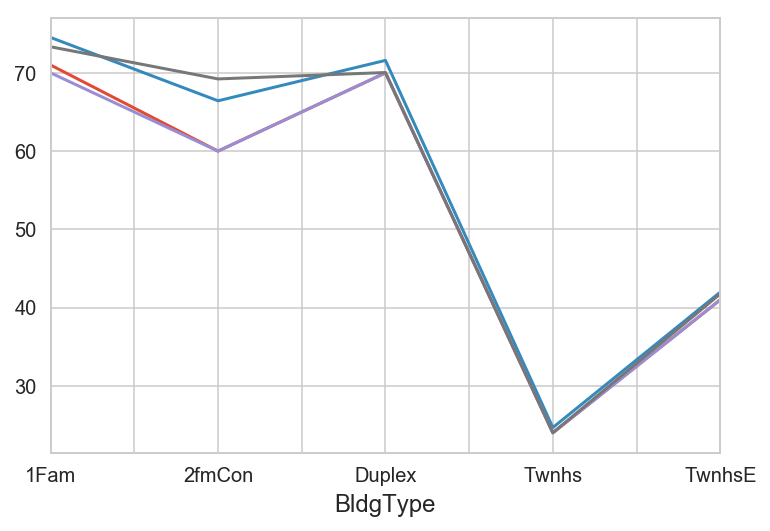

In [76]:
# fill nulls in LotFrontage
house_df_tr['LotFrontage'].groupby(house_df_tr["BldgType"]).median().plot()
house_df_tr['LotFrontage'].groupby(house_df_tr["BldgType"]).mean().plot()


lf_neighbor_map = house_df_tr['LotFrontage'].groupby(house_df_tr["BldgType"]).median()
    
rows = house_df_tr['LotFrontage'].isnull()
house_df_tr['LotFrontage'][house_df_tr['LotFrontage'].isnull() == True]= house_df_tr['BldgType'][rows].map(lambda neighbor : lf_neighbor_map[neighbor])

# fill nulls in LotFrontage (test subset)
house_df_ts['LotFrontage'].groupby(house_df_ts["BldgType"]).median().plot()
house_df_ts['LotFrontage'].groupby(house_df_ts["BldgType"]).mean().plot()


lf_neighbor_map = house_df_ts['LotFrontage'].groupby(house_df_ts["BldgType"]).median()
    
house_df_ts['LotFrontage'][house_df_ts['LotFrontage'].isnull() == True] = house_df_ts['BldgType'].map(lambda neighbor : lf_neighbor_map[neighbor])

In [77]:
# check discription 

house_df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [78]:
# check the correlations between the the features

corr_features = house_df_tr.corr()
corr_features


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011927,-0.014424,-0.033190,-0.027057,0.012719,-0.012516,-0.021086,-0.050536,-0.004248,-0.005682,-0.008401,-0.014966,0.011172,0.006390,-0.045587,0.009342,0.003111,-0.019924,0.006621,0.007551,0.037573,0.003164,0.028051,-0.019201,0.013282,0.017617,0.018546,-0.028916,0.000128,0.003250,-0.046541,0.001601,0.057139,-0.006158,0.020766,0.001552,-0.021168
MSSubClass,0.011927,1.000000,-0.399599,-0.139852,0.031543,-0.059331,0.027637,0.039745,0.023087,-0.070505,-0.065925,-0.140495,-0.239036,-0.252451,0.307422,0.048051,0.074050,0.002778,-0.002544,0.130849,0.176816,-0.023303,0.281634,0.039760,-0.046008,-0.080840,-0.041048,-0.099534,-0.013245,-0.006602,-0.012355,-0.043940,-0.026276,0.008225,-0.007762,-0.013172,-0.022008,-0.084995
LotFrontage,-0.014424,-0.399599,1.000000,0.314130,0.224920,-0.040380,0.097255,0.068012,0.172653,0.211945,0.042896,0.126108,0.363098,0.418852,0.075856,0.040418,0.374995,0.087541,0.000185,0.177445,0.048058,0.259456,-0.003216,0.339744,0.236180,0.093850,0.259626,0.321188,0.075745,0.137788,0.014920,0.064552,0.041615,0.179505,0.003655,0.015688,0.007147,0.334694
LotArea,-0.033190,-0.139852,0.314130,1.000000,0.105881,-0.005825,0.014310,0.013936,0.103363,0.214116,0.111187,-0.002537,0.260900,0.299526,0.051034,0.004282,0.263232,0.158256,0.048056,0.126156,0.014290,0.119689,-0.017778,0.190042,0.271342,0.072600,0.155018,0.180527,0.171791,0.084767,-0.018330,0.020427,0.043172,0.077676,0.038071,0.001115,-0.014484,0.263943
OverallQual,-0.027057,0.031543,0.224920,0.105881,1.000000,-0.091925,0.572561,0.550203,0.406847,0.238891,-0.059640,0.309088,0.537695,0.475835,0.294656,-0.028254,0.592413,0.109958,-0.040575,0.549923,0.272633,0.102041,-0.184409,0.426879,0.396674,0.289631,0.600080,0.561476,0.238062,0.308303,-0.114633,0.030217,0.064526,0.065123,-0.031577,0.071715,-0.028338,0.790878
OverallCond,0.012719,-0.059331,-0.040380,-0.005825,-0.091925,1.000000,-0.375667,0.075105,-0.125505,-0.046489,0.040409,-0.136497,-0.170941,-0.144318,0.029390,0.021543,-0.079812,-0.054573,0.118029,-0.193879,-0.060434,0.012903,-0.086950,-0.057691,-0.024710,-0.006595,-0.185475,-0.151261,-0.002943,-0.032619,0.070597,0.025582,0.054991,-0.001950,0.068868,-0.004296,0.042750,-0.077694
YearBuilt,-0.012516,0.027637,0.097255,0.014310,0.572561,-0.375667,1.000000,0.592777,0.311423,0.249528,-0.049273,0.148988,0.391314,0.281919,0.009889,-0.182832,0.198893,0.187282,-0.038299,0.468148,0.242390,-0.070578,-0.174951,0.095451,0.148084,0.272184,0.537791,0.478836,0.224607,0.188595,-0.387567,0.031298,-0.050521,0.004914,-0.034437,0.012914,-0.013221,0.522851
YearRemodAdd,-0.021086,0.039745,0.068012,0.013936,0.550203,0.075105,0.592777,1.000000,0.175829,0.127986,-0.068319,0.181418,0.290634,0.239953,0.138931,-0.057585,0.286734,0.118306,-0.012751,0.438174,0.182355,-0.040358,-0.150125,0.191194,0.112986,0.146849,0.419714,0.370779,0.204799,0.225929,-0.194756,0.045146,-0.039234,0.005722,-0.010443,0.022796,0.036175,0.506764
MasVnrArea,-0.050536,0.023087,0.172653,0.103363,0.406847,-0.125505,0.311423,0.175829,1.000000,0.260961,-0.071576,0.114073,0.359830,0.339578,0.173291,-0.067371,0.387703,0.082425,0.027221,0.272453,0.198635,0.102928,-0.038625,0.279233,0.247040,0.132888,0.361483,0.370473,0.159499,0.122194,-0.110223,0.019057,0.062053,0.011877,-0.029588,-0.006241,-0.008513,0.472331
BsmtFinSF1,-0.004248,-0.070505,0.211945,0.214116,0.238891,-0.046489,0.249528,0.127986,0.260961,1.000000,-0.050359,-0.495081,0.522304,0.445569,-0.137797,-0.064603,0.207489,0.649095,0.067258,0.057813,0.003678,-0.107266,-0.081199,0.043689,0.259638,0.116055,0.223498,0.296536,0.203873,0.111321,-0.102623,0.026370,0

In [79]:
# check nulls in LotFrontage
house_df_tr['LotFrontage'].isnull().sum()
house_df_ts['LotFrontage'].isnull().sum()

0

0

In [80]:
# check shapes
house_df_tr.shape
house_df_ts.shape

(1458, 81)

(1459, 80)

In [81]:
# check nulls in test and train data
all(house_df_tr.isnull().sum()) , all(house_df_ts.isnull().sum())

(False, False)

## Feature Engineering

In [82]:
# convert (wieghted) categorical values to numeric (train data)

house_df_tr.ExterQual.replace({'Fa' :2,'TA':3, 'Gd' :4, 'Ex':5 }, inplace=True)
house_df_tr.ExterCond.replace({'Po':1, 'Fa' :2,'TA':3, 'Gd' :4, 'Ex':5 }, inplace=True)
house_df_tr.BsmtQual.replace({'Fa' :2 , 'TA':3, 'Gd' :4, 'Ex':5 , 'No Basement': 0}, inplace=True) 
house_df_tr.BsmtCond.replace({ 'Po':1,'Fa' :2 ,'TA':3 , 'Gd' :4 ,'No Basement': 0}, inplace=True) 
house_df_tr.HeatingQC.replace({ 'Po':1 ,'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5}, inplace=True)
house_df_tr.KitchenQual.replace({'No Kithchen': 0, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5}, inplace=True)
house_df_tr.FireplaceQu.replace({'Po':1, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5, 'No Fire Place':0}, inplace=True)
house_df_tr.GarageQual.replace ({'Po':1, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5, 'No Garage':0}, inplace=True)
house_df_tr.GarageCond.replace({'Po':1, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5, 'No Garage':0}, inplace=True)
house_df_tr.PoolQC.replace({ 'Fa' :2 , 'Gd' :4 , 'Ex':5 , 'No Pool':0}, inplace=True)

In [83]:
# convert (wieghted) categorical values to numeric (test data)

house_df_ts.ExterQual.replace({'Fa' :2,'TA':3, 'Gd' :4, 'Ex':5 }, inplace=True)
house_df_ts.ExterCond.replace({'Po':1, 'Fa' :2,'TA':3, 'Gd' :4, 'Ex':5 }, inplace=True)
house_df_ts.BsmtQual.replace({'Fa' :2 , 'TA':3, 'Gd' :4, 'Ex':5 , 'No Basement': 0}, inplace=True) 
house_df_ts.BsmtCond.replace({ 'Po':1,'Fa' :2 ,'TA':3 , 'Gd' :4 ,'No Basement': 0}, inplace=True) 
house_df_ts.HeatingQC.replace({ 'Po':1 ,'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5}, inplace=True)
house_df_ts.KitchenQual.replace({'No Kithchen': 0, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5}, inplace=True)
house_df_ts.FireplaceQu.replace({'Po':1, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5, 'No Fire Place':0}, inplace=True)
house_df_ts.GarageQual.replace ({'Po':1, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5, 'No Garage':0}, inplace=True)
house_df_ts.GarageCond.replace({'Po':1, 'Fa' :2 ,'TA':3 , 'Gd' :4 , 'Ex':5, 'No Garage':0}, inplace=True)
house_df_ts.PoolQC.replace({ 'Fa' :2 , 'Gd' :4 , 'Ex':5 , 'No Pool':0}, inplace=True)

In [84]:
# dummifies the categorical values in train data

house_df1=pd.get_dummies(house_df_tr, columns=['MSZoning','Street', 'Alley','LotShape','LandContour','Utilities','LotConfig',
                                           'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                           'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                                           'Foundation', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                                           'CentralAir','Electrical','Functional','GarageType','GarageFinish',
                                           'PavedDrive','Fence','MiscFeature','SaleType', 'SaleCondition' ])
house_df1.head()
house_df1.shape

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N/A,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_N/A,MasVnrType_Other type,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType

(1458, 265)

In [85]:
# dummifies the categorical values in test data

house_df_test=pd.get_dummies(house_df_ts, columns=['MSZoning','Street', 'Alley','LotShape','LandContour','Utilities','LotConfig',
                                           'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                           'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                                           'Foundation', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                                           'CentralAir','Electrical','Functional','GarageType','GarageFinish',
                                           'PavedDrive','Fence','MiscFeature','SaleType', 'SaleCondition' ])
house_df_test.head()
house_df_test.shape

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N/A,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_N/A,MasVnrType_Other type,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,196

(1459, 248)

In [86]:
house_df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_N/A,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_N/A,MasVnrType_Other type,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.00000

---

## Exploration (Data Visualization)

In this section the data explored after cleaning by providing some visuals to the data (both categorical and numeric data). 

In [87]:
# create dataframe for categorical & numerical features

# exclude numerical 
categorical = house_df.select_dtypes(exclude=["number","bool_"])

# exclude categorical 
numerical = house_df.select_dtypes(exclude=["object"])

**1.1  Numerical Columns**

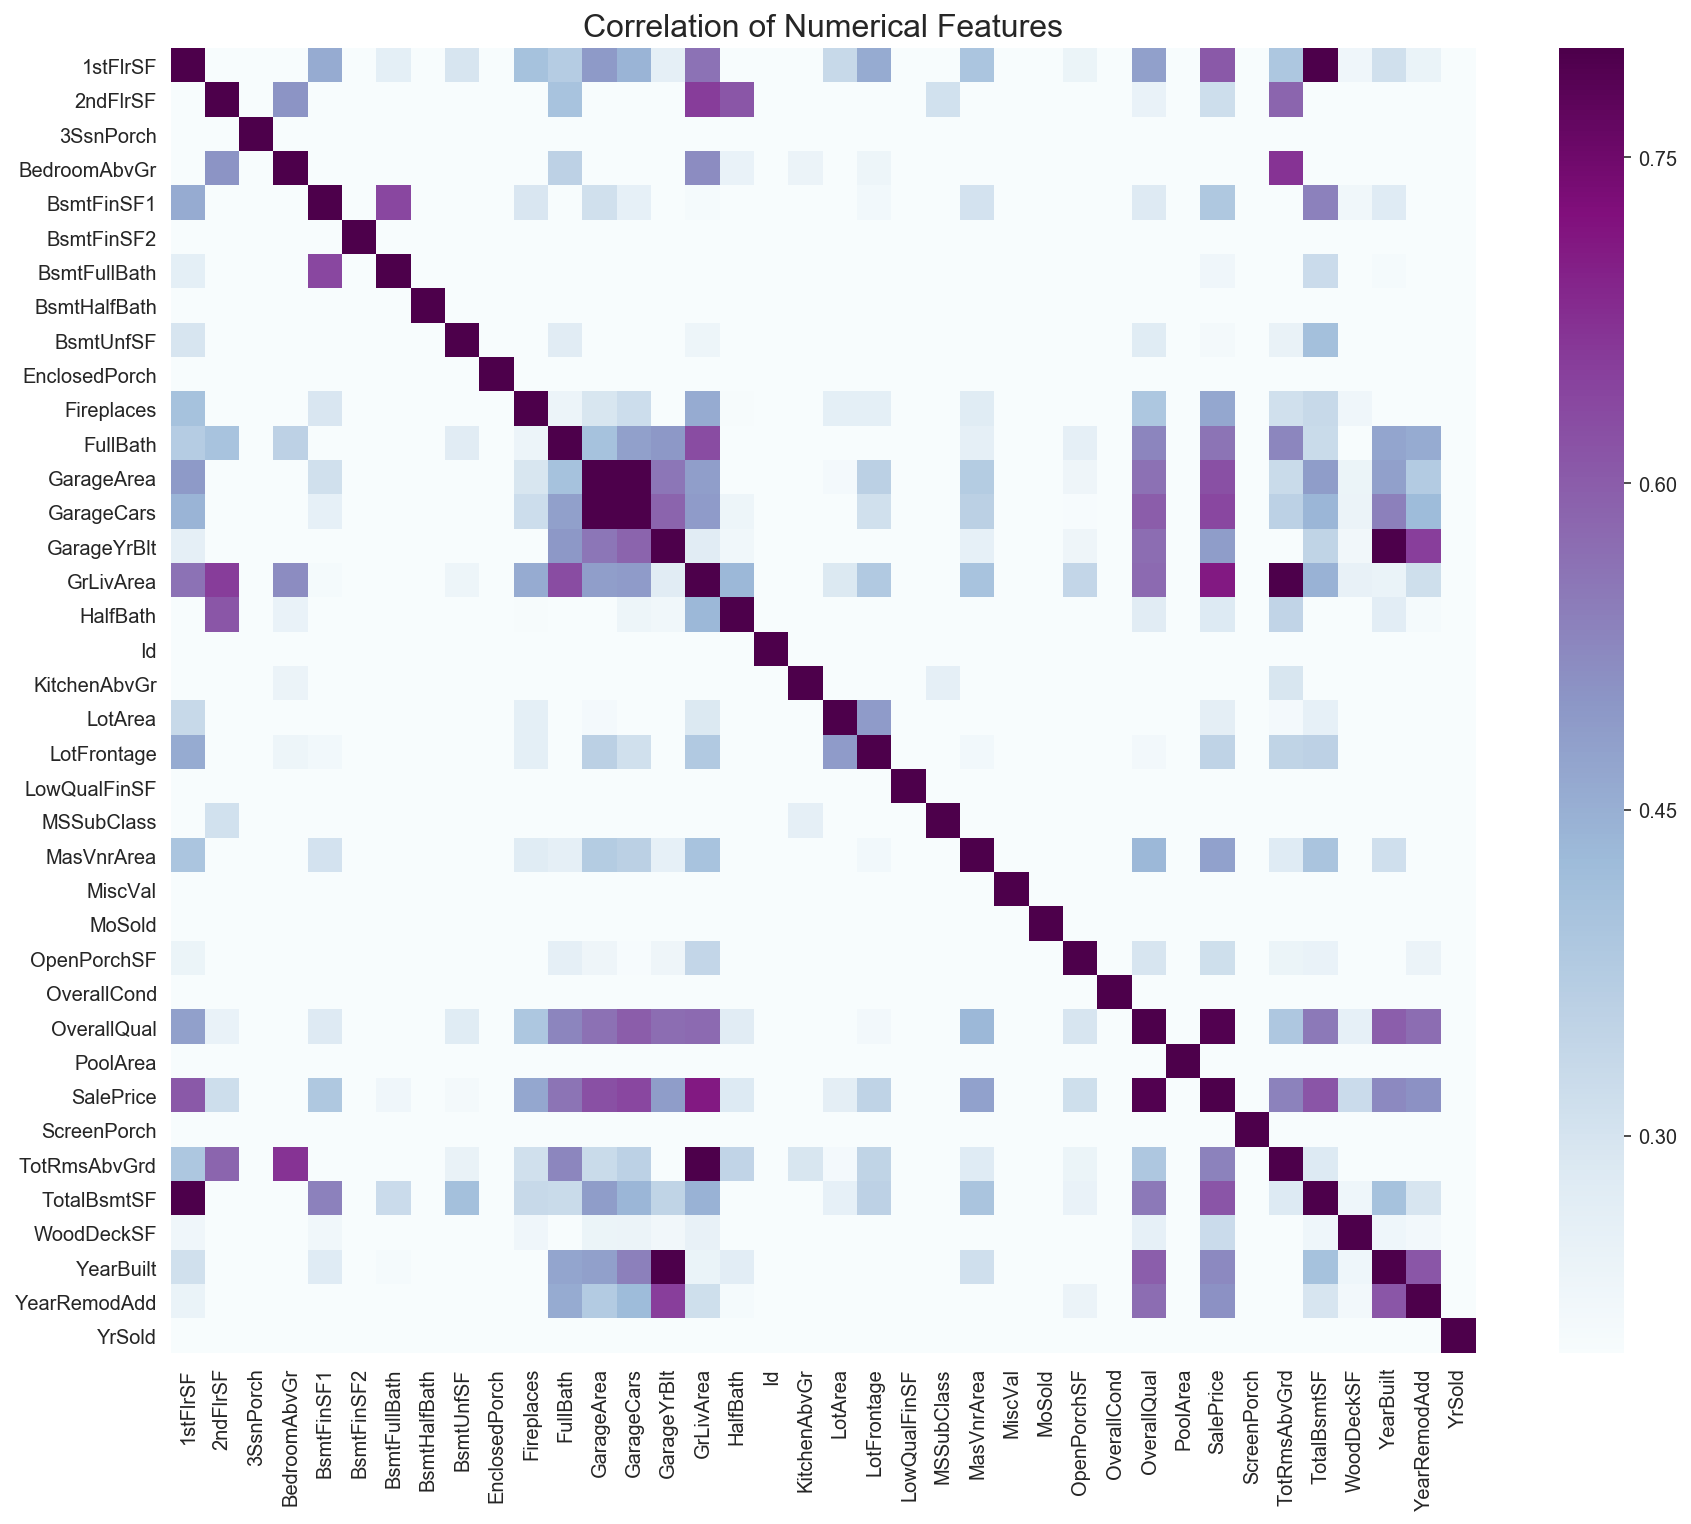

In [88]:
#Draw correlation coefficient matrix to explore the coorelation among different properties:

# Correlation Matrix all features
correlation_matrice = numerical.corr()
f, ax = plt.subplots( figsize=(15, 12))
sns.heatmap(correlation_matrice,vmin=0.2, vmax=0.8, square= True, cmap= 'BuPu')
plt.title('Correlation of Numerical Features', fontsize= 16);



From the graph, we can clearly see that there are two group of features show high correlation 
, one is the correlation coefficient between Garage... feature group. Another is  Fireplaces 
and FireplaceQu .

<Figure size 432x288 with 0 Axes>

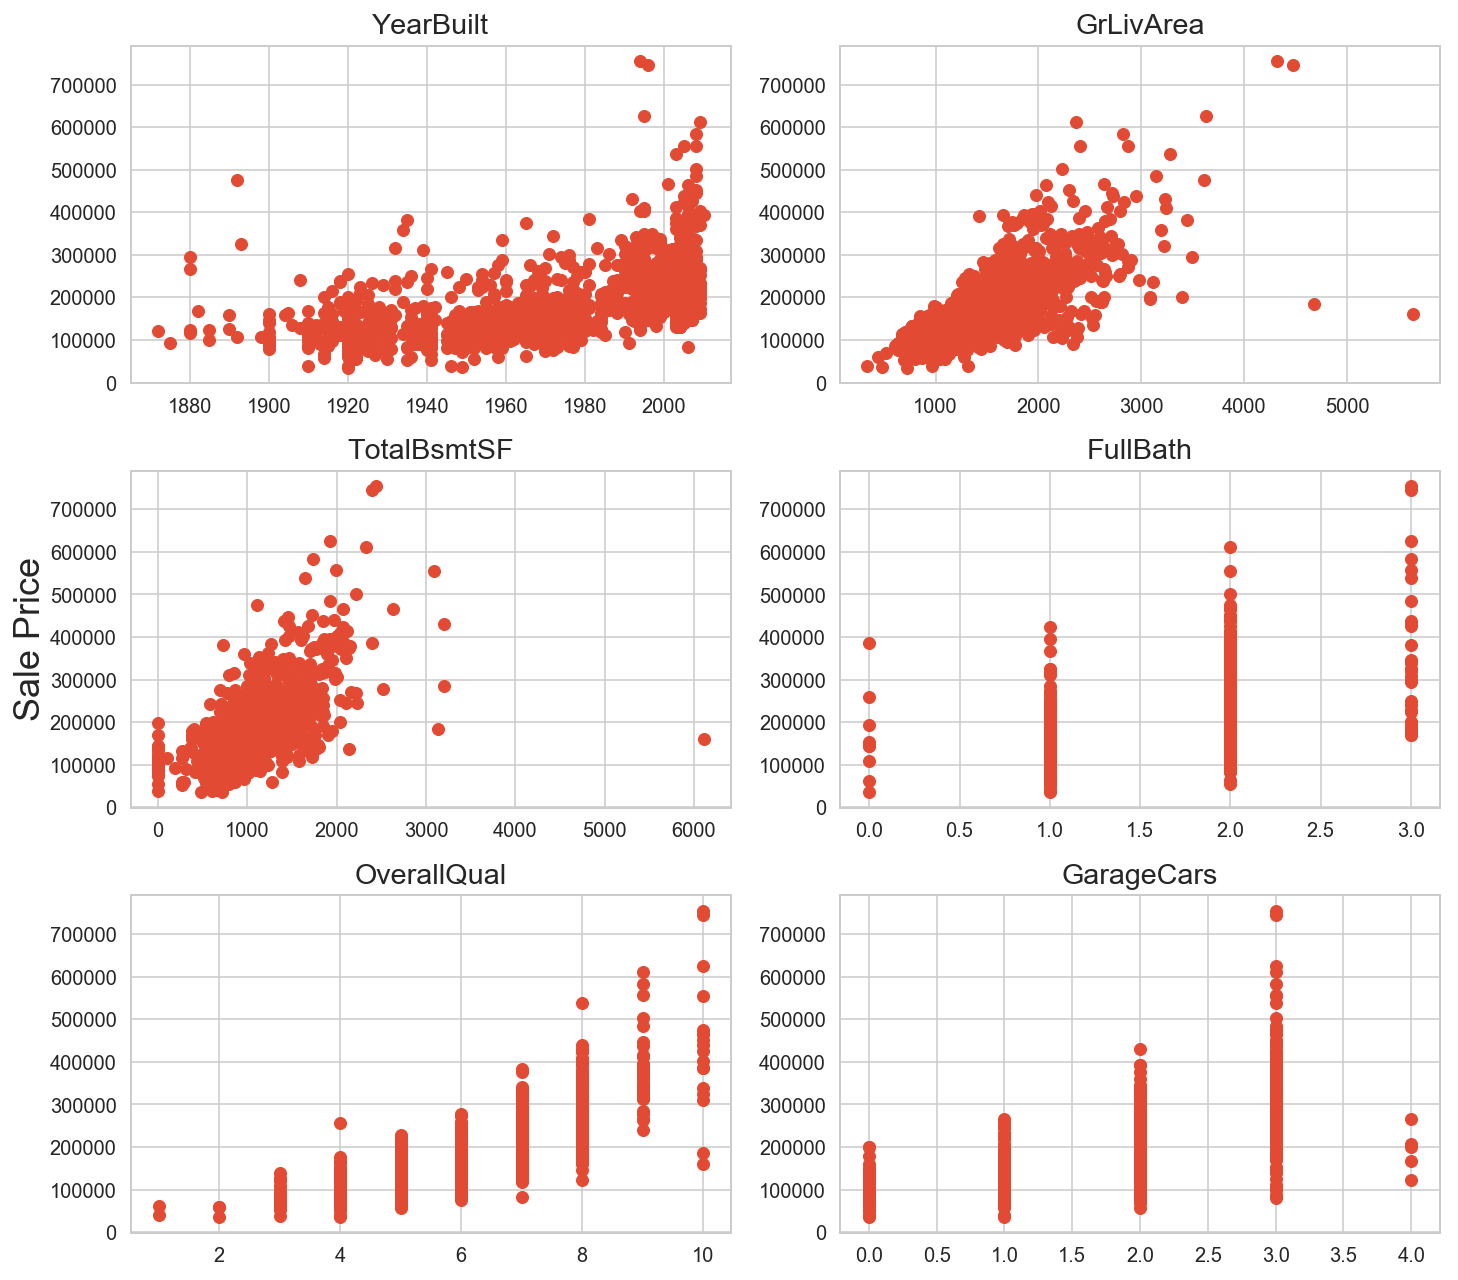

In [89]:
# scatter graph between SalePrice and the most important features:


plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = house_df_tr.SalePrice.values
axarr[0, 0].scatter(house_df_tr['YearBuilt'].values, price)
axarr[0, 0].set_title('YearBuilt')
axarr[0, 1].scatter(house_df_tr.GrLivArea.values, price)
axarr[0, 1].set_title('GrLivArea')
axarr[1, 0].scatter(house_df_tr.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(house_df_tr['FullBath'].values, price)
axarr[1, 1].set_title('FullBath')
axarr[2, 0].scatter(house_df_tr.OverallQual.values, price)
axarr[2, 0].set_title('OverallQual')
axarr[2, 1].scatter(house_df_tr.GarageCars.values, price)
axarr[2, 1].set_title('GarageCars')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show();

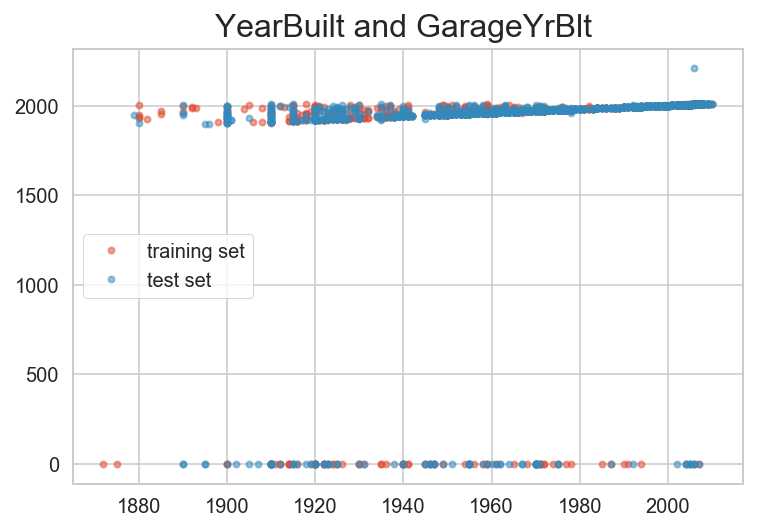

In [90]:
# YearBuilt and GarageYrBlt to be related
plt.plot(house_df_tr.YearBuilt, house_df_tr.GarageYrBlt,
         '.', alpha=0.5, label = 'training set')
 
plt.plot(house_df_ts.YearBuilt, house_df_ts.GarageYrBlt,
         '.', alpha=0.5, label = 'test set')
plt.title('YearBuilt and GarageYrBlt ',fontsize=16)

plt.legend();






(-0.5, 9.5, 0, 800000)

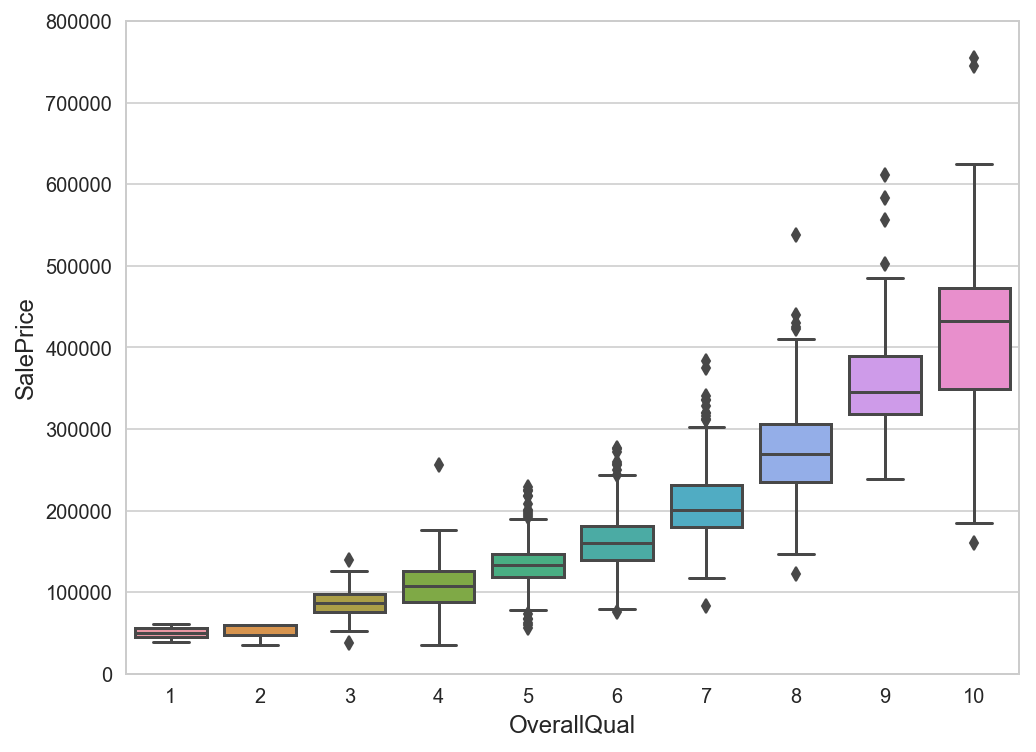

In [91]:
#Here we explore the relationship between OverallQual and SalePrice:

overall_qual = pd.concat([house_df_tr['SalePrice'], house_df_tr['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=overall_qual)
fig.axis(ymin=0, ymax=800000)
plt.show()

It is obvious that the distribution trends of OverallQual and SalePrice are same. Generally, 
the SalePrice increase while OverallQual increase.

In [92]:
print("Some Statistics of the Housing Price:\n")
print(house_df_tr['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", house_df_tr['SalePrice'].median(axis = 0))

Some Statistics of the Housing Price:

count      1458.000000
mean     180998.556927
std       79468.886855
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


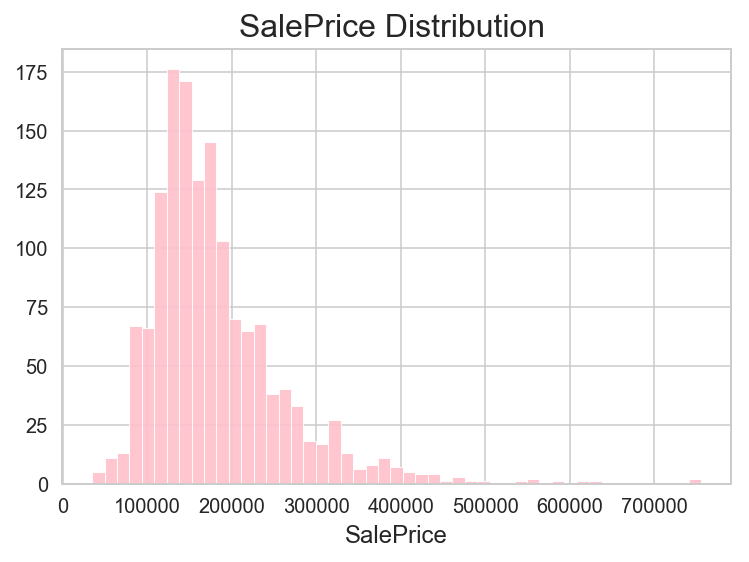

In [93]:
# histogram and not fit a kernel density estimate (KDE).
sns.distplot(house_df_tr['SalePrice'], kde = False, color = 'pink', hist_kws={'alpha': 0.9})
plt.title('SalePrice Distribution ',fontsize=16);

In [94]:
# investigating skewness (measures symmetry) and kurtosis (fat tails) shows that SalePrice is NOT normal
house_df_tr['SalePrice'].skew(), house_df_tr['SalePrice'].kurt()

(1.8811866985633787, 6.528994252459601)

From the histogram above, the distribution of our target variable (SalePrice) is skewed to right. 
Thus, a log term of SalePrice should be generated for linear regression. 

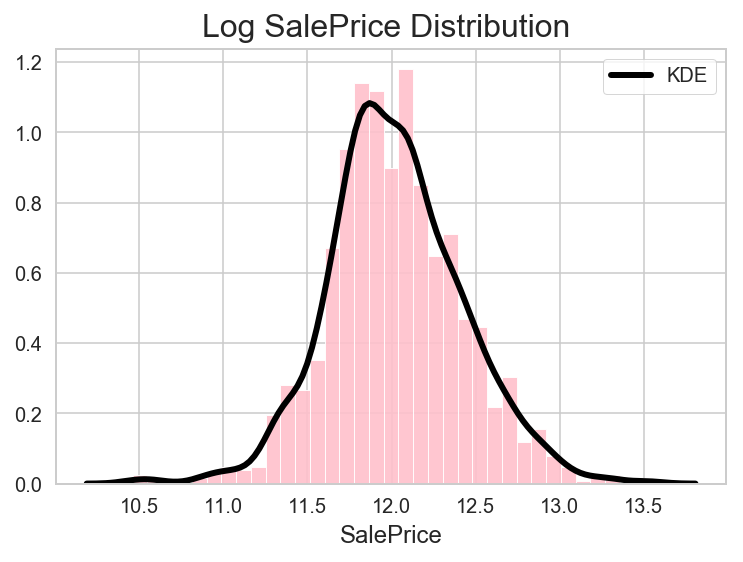

In [95]:
# log transforming our target variable and checking resulting histogram
train_salesprice = np.log(house_df_tr['SalePrice'])
sns.distplot(train_salesprice , kde = True, color = 'pink', hist_kws={'alpha': 0.9}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.title('Log SalePrice Distribution ',fontsize=16);

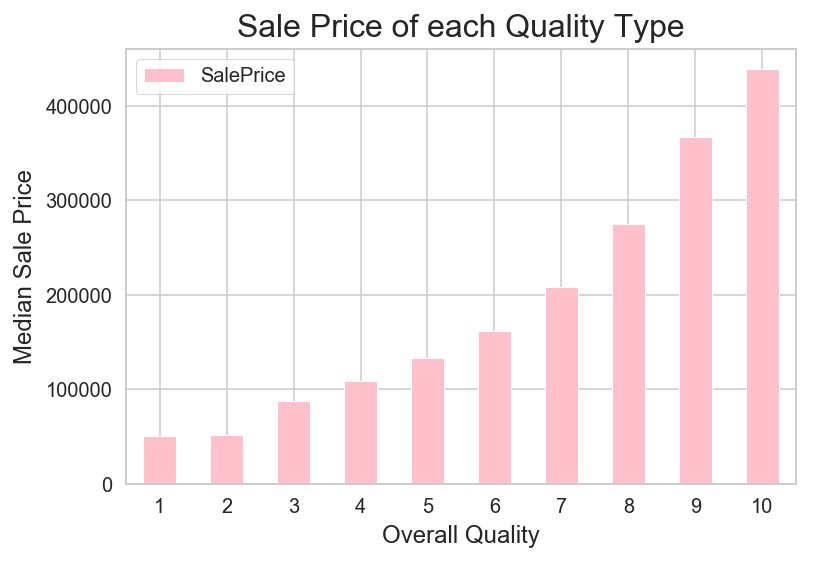

In [96]:
#pivot table of Overall Quality & Sale price
quality_pivot = house_df_tr.pivot_table(index= 'OverallQual', values= 'SalePrice')

#plotting the pivot table



quality_pivot.plot(kind = 'bar', color = 'pink')

plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.title('Sale Price of each Quality Type',fontsize=16);
plt.show();

**1.2 Categorical Columns**

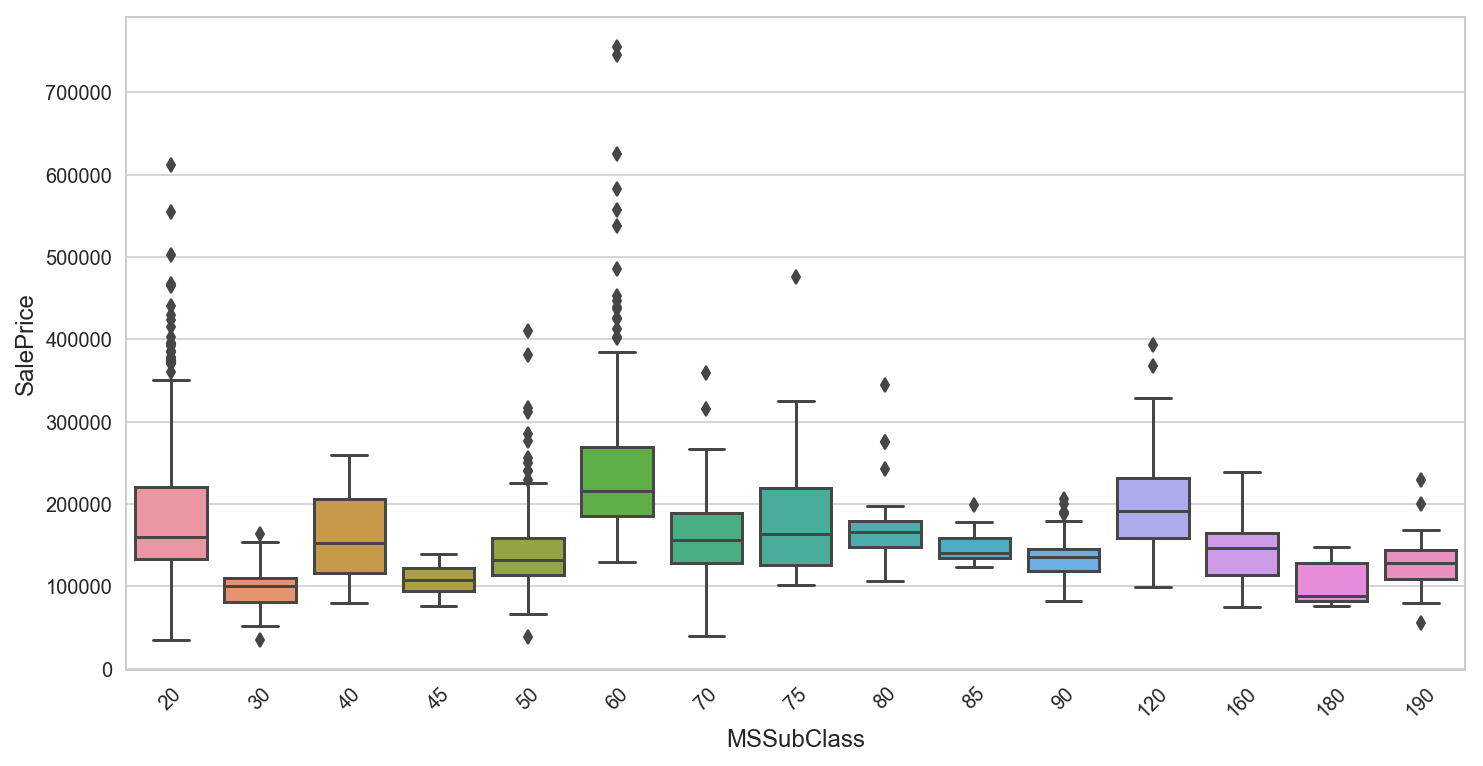

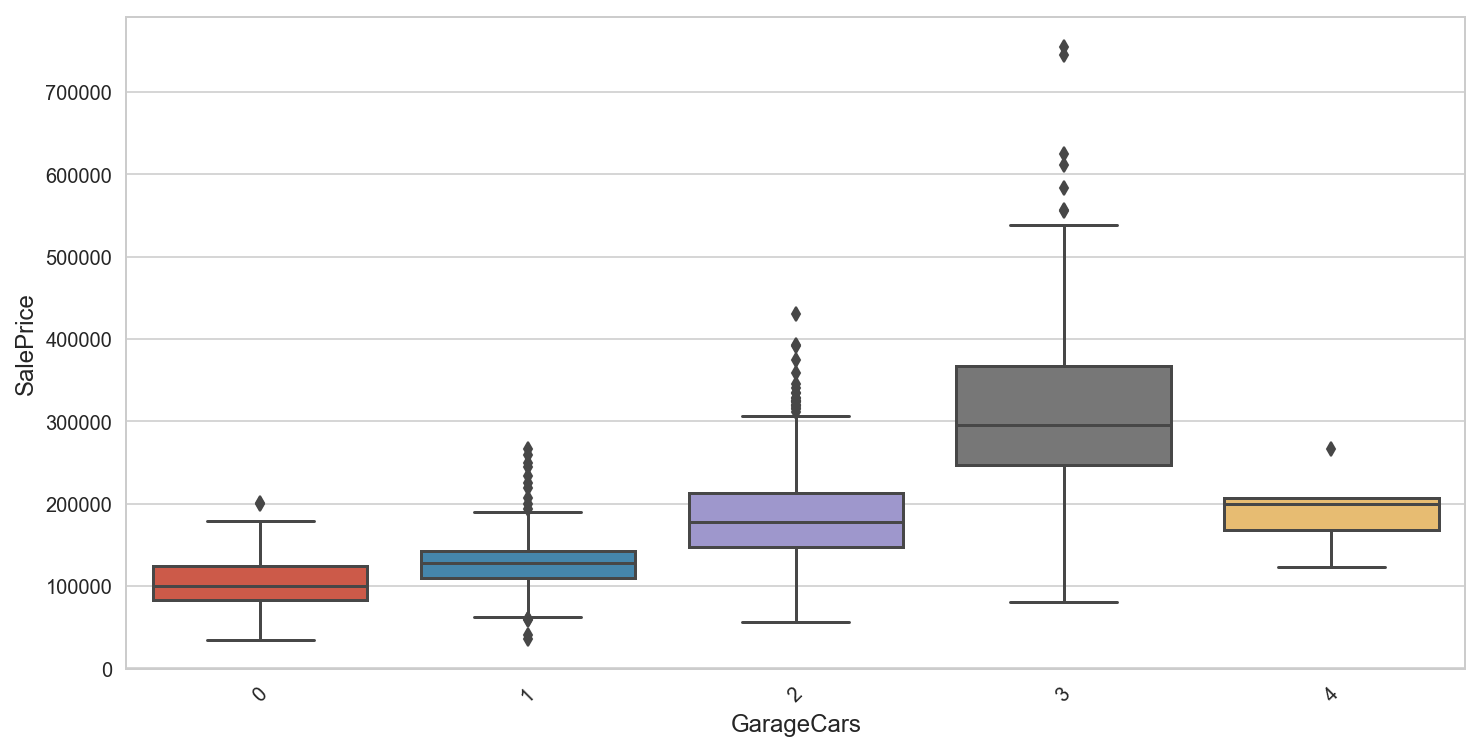

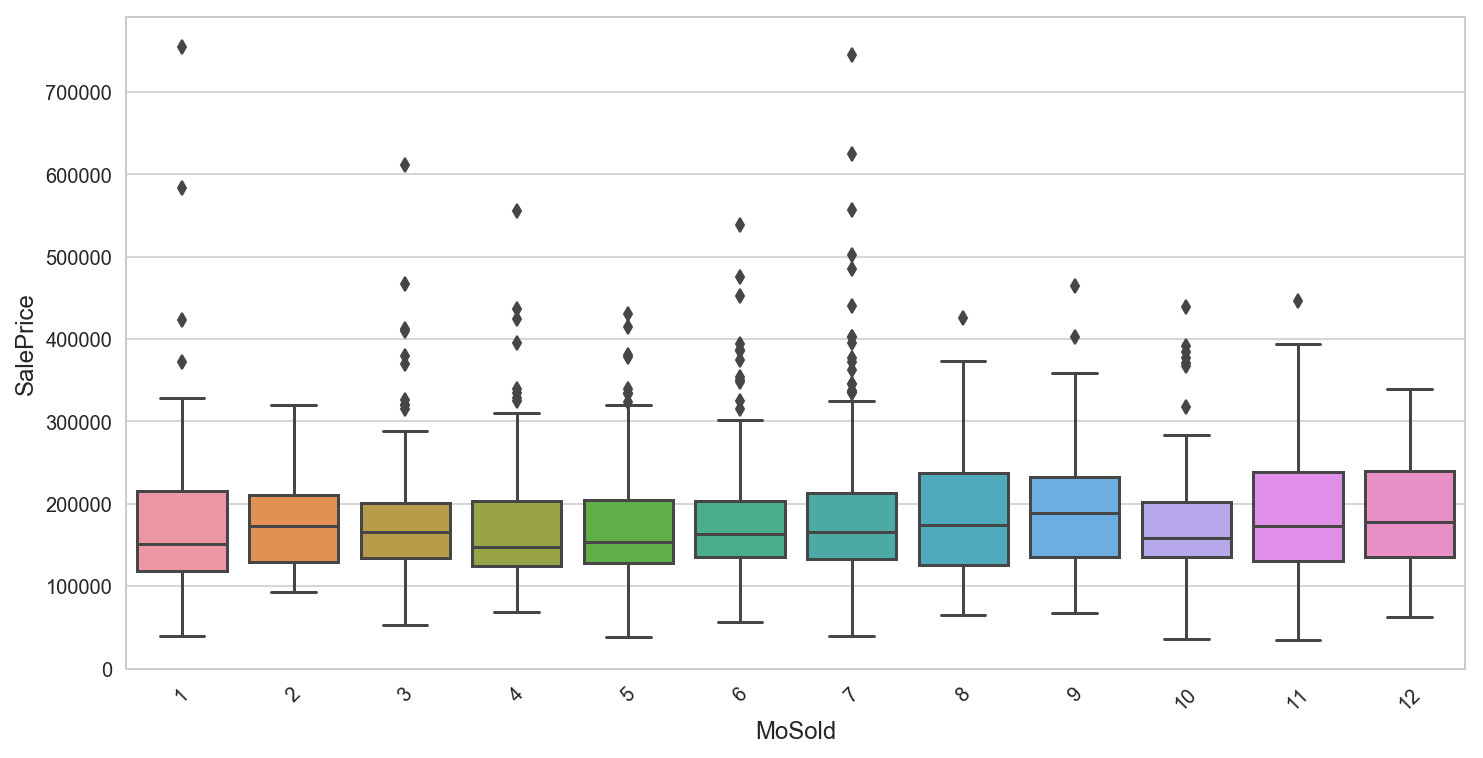

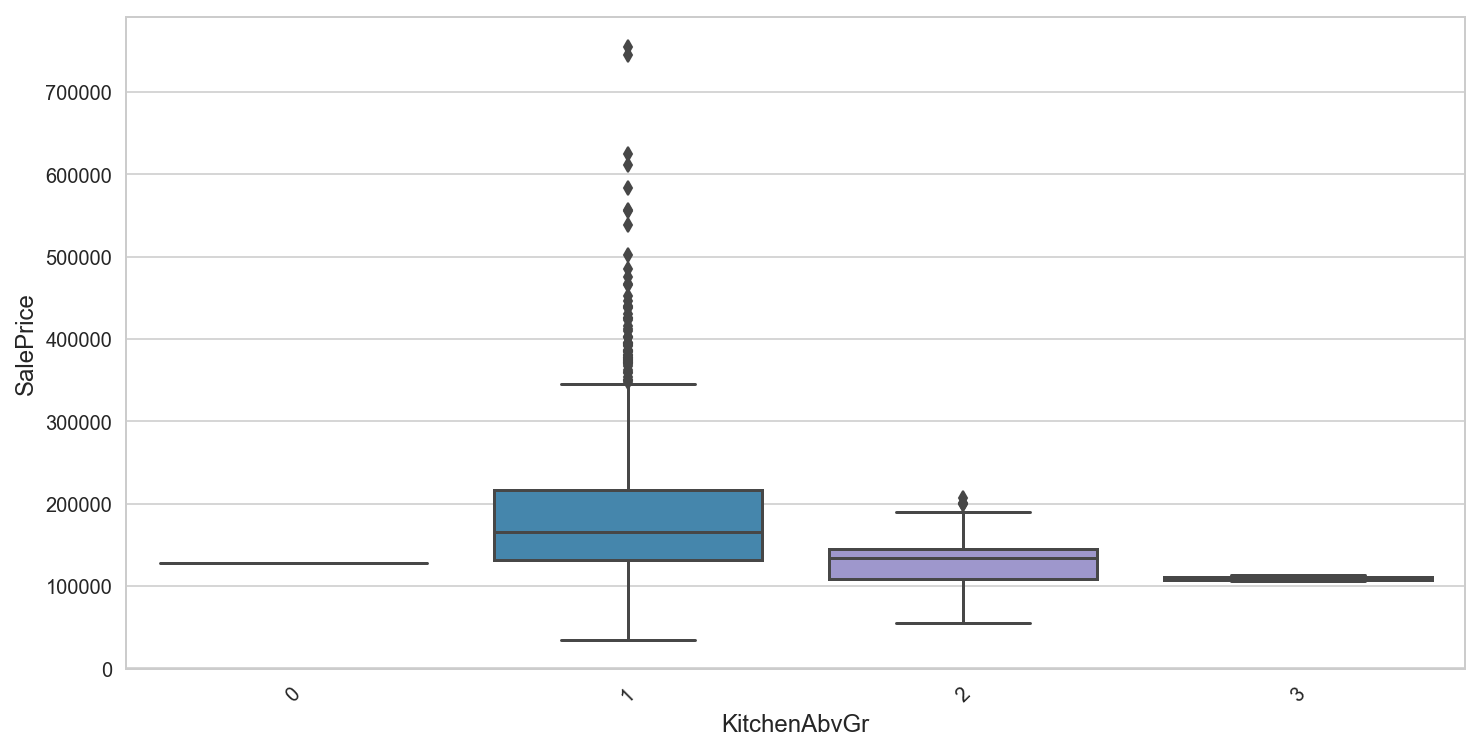

In [97]:
plt.figure(figsize = (12, 6));
sns.boxplot(x = 'MSSubClass', y = 'SalePrice',  data = house_df_tr)
xt = plt.xticks(rotation=45)
plt.figure(figsize = (12, 6));
sns.boxplot(x = 'GarageCars', y = 'SalePrice',  data = house_df_tr)
xt = plt.xticks(rotation=45)
plt.figure(figsize = (12, 6));
sns.boxplot(x = 'MoSold', y = 'SalePrice',  data = house_df_tr)
xt = plt.xticks(rotation=45)
plt.figure(figsize = (12, 6));
sns.boxplot(x = 'KitchenAbvGr', y = 'SalePrice',  data = house_df_tr)
xt = plt.xticks(rotation=45);


- MSZoning vs SalePrice

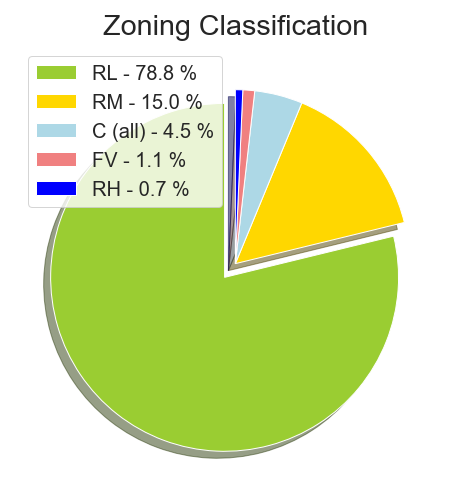

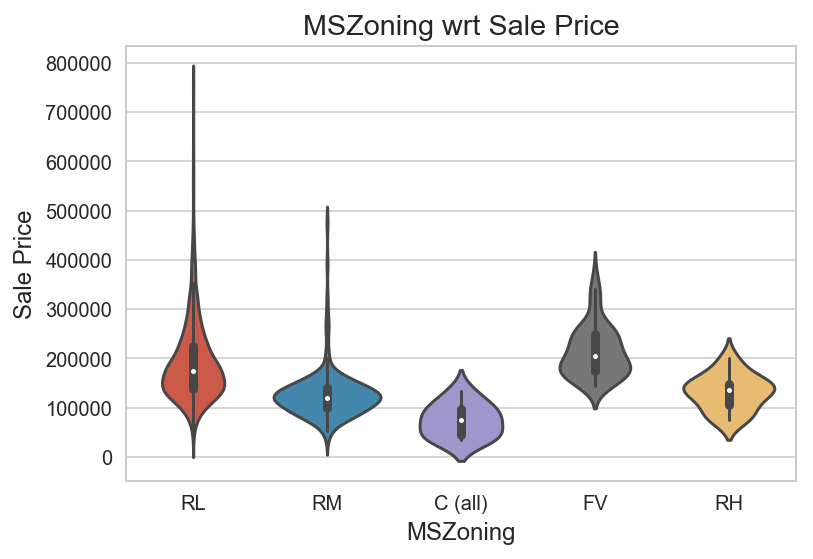

In [98]:

labels = house_df_tr["MSZoning"].unique()
sizes = house_df_tr["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()



sns.violinplot(house_df_tr.MSZoning,house_df_tr["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

- Neighbourhood vs SalePrice

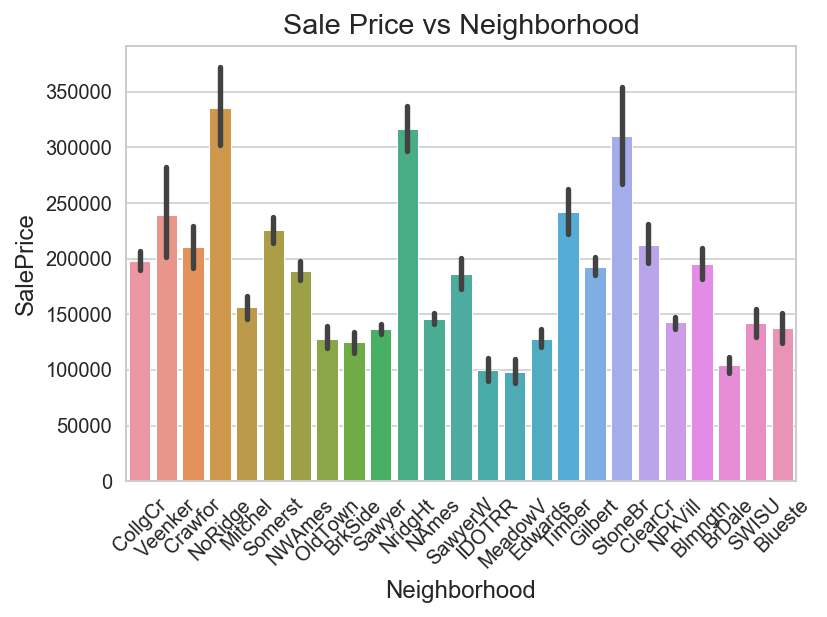

In [99]:
plt.xticks(rotation=45) 
sns.barplot(house_df_tr["Neighborhood"],house_df_tr["SalePrice"])
plt.title("Sale Price vs Neighborhood");

- Street vs SalePrice

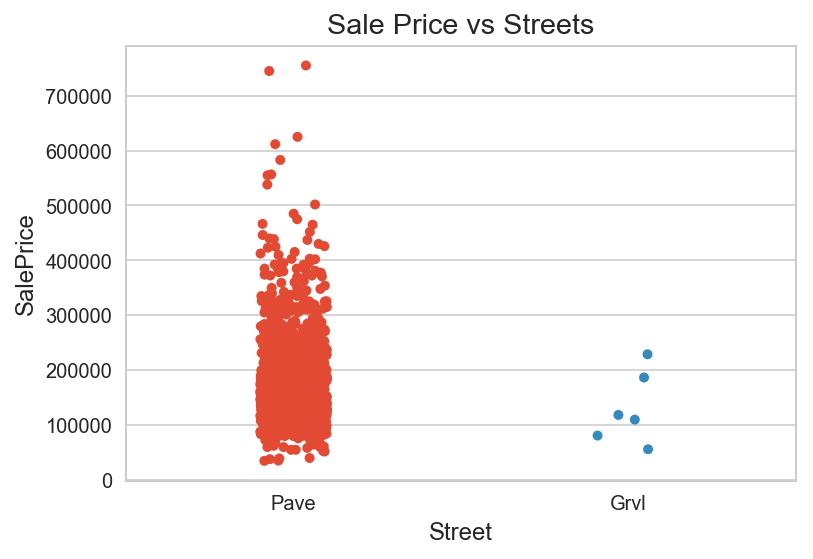

In [100]:
sns.stripplot(x=house_df_tr["Street"], y=house_df_tr["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

It is obvious from the figure above that the most streets are paved. 

- HeatingQC vs SalePrice

C:\Users\monai\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\monai\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


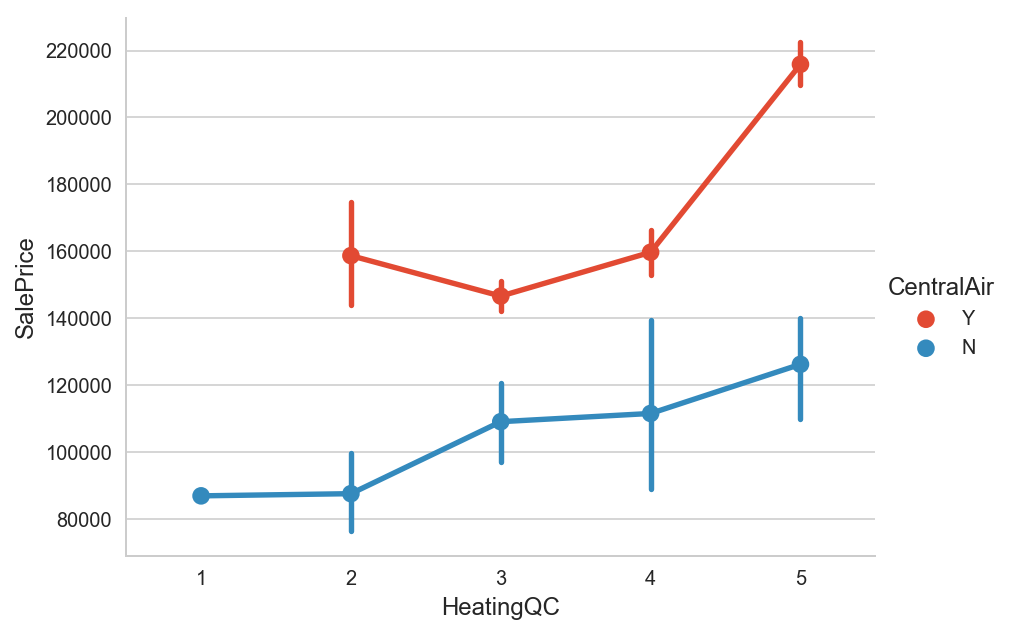

In [101]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = house_df_tr, 
             size = 4.5, aspect = 1.4)

## Modeling 

In this section several models are applied to predict the house prices which are: 
- KNN
- linear regression with lasso
- linear regression with ridge
- Adaboost
- Random Forest)

### - Predict Prices using KNN

In [102]:
# pridect null values using KNN algorithm

# set X, y for KNN, the selcted features for x are refined after check the model with the whole features.

X = house_df1[['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath',
              'YearBuilt','Neighborhood_Edwards','BsmtExposure_Gd',
               'BsmtFinSF1','FireplaceQu','1stFlrSF', '2ndFlrSF',
              'MSZoning_RM', 'TotRmsAbvGrd', 'Condition2_PosN' ]]
y = house_df1['SalePrice']


# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [103]:
# check best parameter

params = {'n_neighbors':[2,5,10,15,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=3)
model.fit(X_train,y_train)
model.best_params_

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_neighbors': 5}

In [104]:
# baseline model

mean_target = [y.mean() for i in range (len(y)) ]
root_squar_err_base_line = np.sqrt(mean_squared_error(y, mean_target))
root_squar_err_base_line

79441.62947530221

In [105]:
# Intialize KNN model
# tried nighbors = 5 and numbers around 6, 7 give best score for the model

knn = KNeighborsRegressor(n_neighbors = 7) 
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [106]:
# Score the model

print('train score ', knn.score(X_train, y_train))
print('test score ', knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))


train score  0.8558973397432178
test score  0.8420268363655302
root mean square error:  29424.276881361995


#### Save Predicted Values

In [107]:
# Predict null values
Xk = house_df_test[['GrLivArea', 'OverallQual', 'GarageCars', 'FullBath',
                'YearBuilt','Neighborhood_Edwards','BsmtExposure_Gd','BsmtFinSF1', 'FireplaceQu','1stFlrSF', '2ndFlrSF',
              'MSZoning_RM', 'TotRmsAbvGrd', 'Condition2_PosN' ]]

Xk = ss.transform(Xk)
house_df_test['SalePrice'] = knn.predict(Xk)

# printing out CSV file to test
KNN_submission = pd.DataFrame({'Id': house_df_test.Id, 'SalePrice': house_df_test['SalePrice'] })
KNN_submission.to_csv('Knn2_submission.csv', index=False)

---

###  - Predict Prices using Linear regression with Lasso

In [108]:
#create intersection list of both headers(train, and test subsets)

temp = set(list(house_df_test.columns)) 
X_features = [value for value in (list(house_df1.columns)) if value in temp] 
     
X_features.remove ('Id')
X_features.remove ('SalePrice')


In [109]:
# try linear regression model with Lasso

# set X, y for RT
X = house_df1[X_features]
y = house_df1['SalePrice']

# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lasso = LassoCV(random_state = 42)
lasso.fit (X_train, y_train)

C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=42, selection='cyclic',
    tol=0.0001, verbose=False)

In [110]:
# baseline model

mean_target = [y.mean() for i in range (len(y)) ]
root_squar_err_base_line = np.sqrt(mean_squared_error(y, mean_target))
root_squar_err_base_line

79441.62947530221

In [111]:
# check model scores

print('train score ', lasso.score(X_train, y_train))
print('test score ', lasso.score(X_test, y_test))

y_pred = lasso.predict(X_test)
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))


train score  0.8079496757898272
test score  0.8454479455000784
root mean square error:  30648.156747139226


In [112]:
# check coefficients to identify the features importance

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(30)

,variable,coef,abs_coef
20,GrLivArea,1.900369e+04,1.900369e+04
3,OverallQual,1.895334e+04,1.895334e+04
32,GarageCars,8.097382e+03,8.097382e+03
8,ExterQual,6.594929e+03,6.594929e+03
27,KitchenQual,6.287622e+03,6.287622e+03
10,BsmtQual,4.694892e+03,4.694892e+03
89,Neighborhood_NridgHt,4.641590e+03,4.641590e+03
174,BsmtExposure_Gd,4.111403e+03,4.111403e+03
12,BsmtFinSF1,3.546717e+03,3.546717e+03
17,1stFlrSF,3.268232e+03,3.268232e+03


In [113]:
#try linear regression model

# set X, y for RT

X = house_df1[['GrLivArea', 'OverallQual', 'GarageCars','KitchenQual', 'ExterQual', 'BsmtQual',
                'BsmtQual','Neighborhood_NridgHt','BsmtExposure_Gd','BsmtFinSF1', 
               '1stFlrSF', 'FireplaceQu','Neighborhood_NoRidge', 'RoofMatl_WdShngl', 'SaleType_New',
               'MasVnrArea', 'Neighborhood_StoneBr', 'MSZoning_RM', 'TotRmsAbvGrd', 'LotArea', 
               'TotRmsAbvGrd', 'Condition2_PosN' ,'MSSubClass','BsmtExposure_No', 'YearBuilt' ]]
y = house_df1['SalePrice']

# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# initialize lasso obj
lasso1 = LassoCV(random_state = 42, alphas = [1, 100, 200])
lasso1.fit (X_train, y_train)

# check model scores
print('train score ', lasso1.score(X_train, y_train))
print('test score ', lasso1.score(X_test, y_test))

y_pred = lasso1.predict(X_test)
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))


C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[1, 100, 200], copy_X=True, cv='warn', eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=False)

train score  0.8488931793653549
test score  0.862579310713514
root mean square error:  28899.67974612193


#### Save Predicted Values

In [114]:
# Predict null values
Xl = house_df_test[['GrLivArea', 'OverallQual', 'GarageCars','KitchenQual', 'ExterQual', 'BsmtQual',
                'BsmtQual','Neighborhood_NridgHt','BsmtExposure_Gd','BsmtFinSF1', 
               '1stFlrSF', 'FireplaceQu','Neighborhood_NoRidge', 'RoofMatl_WdShngl', 'SaleType_New',
               'MasVnrArea', 'Neighborhood_StoneBr', 'MSZoning_RM', 'TotRmsAbvGrd', 'LotArea', 
               'TotRmsAbvGrd', 'Condition2_PosN' ,'MSSubClass','BsmtExposure_No', 'YearBuilt' ]]

Xl = ss.transform(Xl)
house_df_test['SalePrice'] = lasso1.predict(Xl)


# printing out CSV file to test
lassocv_submission = pd.DataFrame({'Id': house_df_test.Id, 'SalePrice': house_df_test['SalePrice'] })
lassocv_submission.to_csv('Lass2_submission.csv', index=False)

---

### - Predict Prices using Linear Regression with Ridge

In [115]:
# try linear regression model with Ridge

# set X, y for RT
X = house_df1[X_features]
y = house_df1['SalePrice']

# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# initialize rige obj
ridge = RidgeCV()
ridge.fit (X_train, y_train)

# check model scores

print('train score ', ridge.score(X_train, y_train))
print('test score ', ridge.score(X_test, y_test))

y_pred = ridge.predict(X_test)
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))



RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

train score  0.9108019868994609
test score  0.8105360846032981
root mean square error:  33933.62239800578


In [116]:
# baseline model

mean_target = [y.mean() for i in range (len(y)) ]
root_squar_err_base_line = np.sqrt(mean_squared_error(y, mean_target))
root_squar_err_base_line

79441.62947530221

In [117]:
# check coefficients to identify the features importance
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(30)

,variable,coef,abs_coef
20,GrLivArea,12118.980494,1.900369e+04
3,OverallQual,10407.937016,1.895334e+04
32,GarageCars,4951.627307,8.097382e+03
8,ExterQual,4204.561704,6.594929e+03
27,KitchenQual,4165.782516,6.287622e+03
10,BsmtQual,7913.505092,4.694892e+03
89,Neighborhood_NridgHt,9802.116642,4.641590e+03
174,BsmtExposure_Gd,5191.174684,4.111403e+03
12,BsmtFinSF1,2391.393778,3.546717e+03
17,1stFlrSF,4445.365009,3.268232e+03


In [118]:
# Ridege model

# set X, y for RT
X = house_df1[['GrLivArea', 'OverallQual', 'GarageCars','KitchenQual', 'ExterQual', 
                'BsmtQual','Neighborhood_NridgHt','BsmtExposure_Gd','BsmtFinSF1', 
               '1stFlrSF', 'FireplaceQu','Neighborhood_StoneBr', 'MSZoning_RM' ]]

y = house_df1['SalePrice']

# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#initialize ridge obj

rdige1 =RidgeCV( alphas = [5, 100, 1000])
rdige1.fit(X_train, y_train)

# check model scores
print('train score ', rdige1.score(X_train, y_train))
print('test score ', rdige1.score(X_test, y_test))

y_pred = rdige1.predict(X_test)
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))


RidgeCV(alphas=array([   5,  100, 1000]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

train score  0.8038977843718688
test score  0.848850462977603
root mean square error:  30308.914281325604


#### Save Predicted Values

In [119]:
# Predict null values
Xr = house_df_test[['GrLivArea', 'OverallQual', 'GarageCars','KitchenQual', 'ExterQual', 
                'BsmtQual','Neighborhood_NridgHt','BsmtExposure_Gd','BsmtFinSF1', 
               '1stFlrSF', 'FireplaceQu','Neighborhood_StoneBr', 'MSZoning_RM' ]]
Xr = ss.transform(Xr)
house_df_test['SalePrice'] = rdige1.predict(Xr)

# printing out CSV file to test
ridge_submission = pd.DataFrame({'Id': house_df_test.Id, 'SalePrice': house_df_test['SalePrice'] })
ridge_submission.to_csv('Ridge2_submission.csv', index=False)

---

### - Predict Prices using Adaboost model

In [120]:
# pridect null values using Adaboost algorithm

# set X, y for RT
X = house_df1.drop(['SalePrice', 'Id'], axis = 1)
y = house_df1['SalePrice']

# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data 

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [121]:
# check best parameter

ada = AdaBoostRegressor()
search_grid = {'n_estimators':[500,1000,2000], 'learning_rate':[.001,0.01,.1], 'random_state':[1]}
model = GridSearchCV(estimator= ada, param_grid = search_grid, scoring = 'neg_mean_squared_error', n_jobs = 1)
model.fit(X_train,y_train)
model.best_params_


C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [500, 1000, 2000], 'learning_rate': [0.001, 0.01, 0.1], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 1}

In [122]:
# check best estimator
model.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=500, random_state=1)

In [123]:
# baseline model

mean_target = [y.mean() for i in range (len(y)) ]
root_squar_err_base_line = np.sqrt(mean_squared_error(y, mean_target))
root_squar_err_base_line

79441.62947530221

In [124]:
# adaboots with the best prameters
adaboost = AdaBoostRegressor(n_estimators=500, base_estimator=None, learning_rate= 0.1, random_state = 1, loss='linear')
adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)

# check scores
print ('train score ', adaboost.score(X_train, y_train))
print ('test score ', adaboost.score(X_test, y_test))

# calculate root square error
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))



AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=500, random_state=1)

train score  0.8803333977217629
test score  0.8326490932470995
root mean square error:  31891.944801039852


In [125]:
# plot feature importance
f = pd.Series(adaboost.feature_importances_, X.columns).sort_values(ascending=False)
f
# f.plot(kind = 'barh')


OverallQual                           0.231293
GrLivArea                             0.097270
TotalBsmtSF                           0.084787
TotRmsAbvGrd                          0.079197
KitchenQual                           0.074789
GarageCars                            0.074762
MasVnrArea                            0.049590
LotArea                               0.030712
BsmtFinSF1                            0.029339
LotFrontage                           0.028675
Condition1_Norm                       0.026653
2ndFlrSF                              0.025928
OpenPorchSF                           0.022294
WoodDeckSF                            0.015999
1stFlrSF                              0.011690
MoSold                                0.011033
YearRemodAdd                          0.010388
BsmtQual                              0.009052
Exterior2nd_HdBoard                   0.008960
Exterior1st_HdBoard                   0.007623
ExterQual                             0.007475
BsmtFinType1_

In [126]:
# pridect null values using Adaboost algorithm

# set X, y for Adaboost

X = house_df1[['GrLivArea', 'OverallQual', 'GarageCars','TotalBsmtSF','KitchenQual','LotFrontage', 'LotArea', 'Condition1_Norm'
                ,'YearBuilt','BsmtQual','BsmtExposure_Gd','BsmtFinSF1', 'WoodDeckSF','1stFlrSF', '2ndFlrSF',
               'MSSubClass', 'MSZoning_RM', 'TotRmsAbvGrd' ]] 

y = house_df1['SalePrice']


# Do train test split with 30% as test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# initialize the Adaboost model
ada = AdaBoostRegressor(n_estimators=500, base_estimator=None, learning_rate= 0.1, random_state = 1, loss='linear')
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)


# check scores
print ('train score ', ada.score(X_train, y_train))
print ('test score ', ada.score(X_test, y_test))


 #calculate root square error
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))



AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=500, random_state=1)

train score  0.8767065409532364
test score  0.853304758097996
root mean square error:  29858.98101367629


#### Save Predicted Values

In [127]:
# Predict null values

Xa = house_df_test [['GrLivArea', 'OverallQual', 'GarageCars','TotalBsmtSF','KitchenQual','LotFrontage', 'LotArea', 'Condition1_Norm'
                ,'YearBuilt','BsmtQual','BsmtExposure_Gd','BsmtFinSF1', 'WoodDeckSF','1stFlrSF', '2ndFlrSF',
               'MSSubClass', 'MSZoning_RM', 'TotRmsAbvGrd' ]]
Xa = ss.transform(Xa)
house_df_test['SalePrice'] = ada.predict(Xa)

# printing out CSV file to test
ada_submission = pd.DataFrame({'Id': house_df_test.Id, 'SalePrice': house_df_test['SalePrice'] })
ada_submission.to_csv('Adaboost2_submission.csv', index=False)

---

### Predict Prices Using Random Forest

In [129]:
# pridect null values using RT algorithm

# set X, y for RT
X = house_df1.drop(['SalePrice', 'Id'], axis = 1)
y = house_df1['SalePrice']

# Do train test split with 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [130]:
#check best parameters

rt = RandomForestRegressor()
search_grid = {'n_estimators':[500,1000,2000], 'max_depth': [4,10, 50, 100],'random_state':[1]}
model = GridSearchCV(estimator= rt, param_grid = search_grid, scoring = 'neg_mean_squared_error', n_jobs = 1)
model.fit(X_train,y_train)
model.best_params_

C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [500, 1000, 2000], 'max_depth': [4, 10, 50, 100], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

{'max_depth': 10, 'n_estimators': 500, 'random_state': 1}

In [131]:
# check best estimator

model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [156]:
# baseline model

mean_target = [y.mean() for i in range (len(y)) ]
root_squar_err_base_line = np.sqrt(mean_squared_error(y, mean_target))
root_squar_err_base_line

79441.62947530221

In [132]:
# initialize the RT model
forest = RandomForestRegressor(n_estimators = 500, max_features ='sqrt', random_state= 1, max_depth=10, oob_score = False)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# check model scorse
print ('train score ', forest.score(X_train, y_train))
print ('test score ', forest.score(X_test, y_test))

# check rmse
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

train score  0.9630501268891469
test score  0.8825913687805805
root mean square error:  26712.650456871535


In [159]:
# plot feature importance
f_ = pd.Series(forest.feature_importances_, X.columns).sort_values(ascending=False)
f_
# f_.plot(kind = 'barh')


GrLivArea                             6.842678e-02
OverallQual                           6.715492e-02
GarageCars                            4.960300e-02
TotalBsmtSF                           4.509735e-02
1stFlrSF                              4.276250e-02
ExterQual                             4.032497e-02
GarageArea                            4.002799e-02
BsmtQual                              3.826919e-02
KitchenQual                           3.757234e-02
YearBuilt                             3.370035e-02
BsmtFinSF1                            3.073044e-02
GarageYrBlt                           2.903548e-02
FireplaceQu                           2.548364e-02
FullBath                              2.440676e-02
2ndFlrSF                              2.275412e-02
YearRemodAdd                          2.256666e-02
TotRmsAbvGrd                          2.233510e-02
LotArea                               2.197456e-02
MasVnrArea                            1.981187e-02
OpenPorchSF                    

In [134]:

# pridect null values using RT algorithm

# set X, y for RT                        
       
X = house_df1[['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'BsmtQual', 
     '1stFlrSF', 'KitchenQual', 'GarageArea', 'YearBuilt', 'BsmtFinSF1', 
      'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'LotArea', '2ndFlrSF','Fireplaces']]  
y = house_df1['SalePrice']
 
# Do train test split with 30% as test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle  = True, random_state  = 42)

# Do Scaling for data

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# initialize the RT model
forest1 = RandomForestRegressor(n_estimators = 500, max_features ='sqrt', random_state= 1, oob_score = False)
forest1.fit(X_train, y_train)
y_pred = forest1.predict(X_test)

# check scores
print ('train score ', forest1.score(X_train, y_train))
print ('test score ', forest1.score(X_test, y_test))

# check rmse
print('root mean square error: ', np.sqrt(mean_squared_error(y_test ,y_pred)))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

train score  0.9779712536475609
test score  0.9113075310627083
root mean square error:  23217.22665282274


#### Save Predicted Values

In [161]:
# predict the tested data
Xs = house_df_test[['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'BsmtQual', 
     '1stFlrSF', 'KitchenQual', 'GarageArea', 'YearBuilt', 'BsmtFinSF1', 
      'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'LotArea', '2ndFlrSF','Fireplaces']]
Xs = ss.transform(Xs)
house_df_test['SalePrice'] = forest1.predict(Xs)

In [162]:
# printing out CSV file to test
forest_submission = pd.DataFrame({'Id': house_df_test.Id, 'SalePrice': house_df_test['SalePrice'] })
forest_submission.to_csv('RT2_submission.csv', index=False)

## Conclusion and Recommendations


**Answer:**

The project proceed through deffirent stages from problem formulation, EDA, cleaning and to modeling. The data are cleaned by checking incorrect values, duplications, and missing values. Exploration over the data is conducted on both categorical and numerical data. Several regression models are used for predicting sale prices results (linear regression with lasso, linear regression with ridge, KNN, Adaboost, and Random Forest). In each model the data are splitted into train and test subsets. The figure below shows the varaition between the accurcy between the models:


In [114]:
#model evaluation
models = []

models.append(('AdaBoost',AdaBoostRegressor()))
models.append(('KNeighbors', KNeighborsRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('LRLasso', LassoCV()))
models.append(('LRRidge', Ridge()))


In [115]:

# prepare configuration for cross validation test harness

seed = 7

# set X, y 
X_bestmodel = house_df1.drop(['SalePrice', 'Id'], axis = 1)
y_bestmodel = house_df1['SalePrice']

# evaluate each model in turn

results = []
names = []

scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_bestmodel , y_bestmodel , cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AdaBoost: 0.796329 (0.044350)
KNeighbors: 0.665789 (0.064101)


C:\Users\monai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RandomForest: 0.851592 (0.052567)


C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\monai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

LRLasso: 0.714871 (0.149301)
LRRidge: 0.830959 (0.103114)


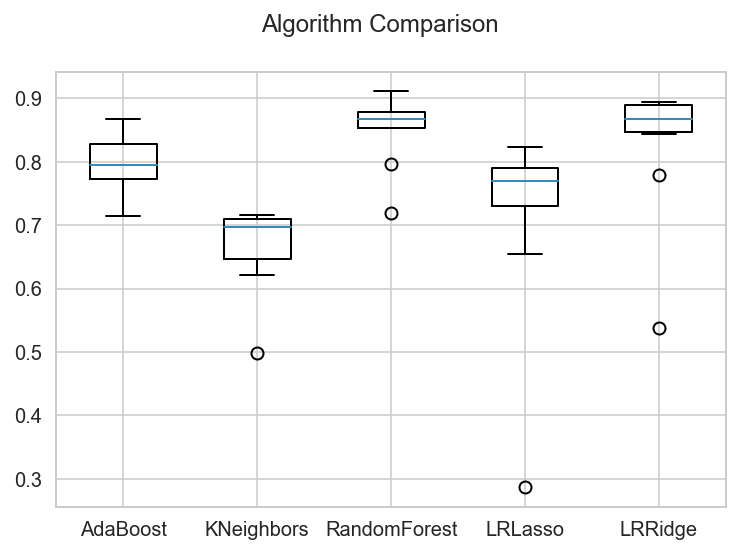

In [116]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

However, the all features are testes in each model then, the the coefficients or features importance (depends on the model type) used to prioritiez the features in order to enhance the model's 'R2' score and root mean squred error value.<br>     

Based on the evalution of Random Forest Regressor provides the highest accurcy, with '97%' for trained and '91%' for tested data. Thus, the stakholders in the field can have a mostly accurate assumptions (with more than 90%) about the prices. It is impotant to shed the light upon the housing features which made a major effect on the predicted prices by RT model wich are:
- 'GrLivArea'             
- 'KitchenQual'
- 'GarageArea'            
- 'YearBuilt' 
- 'BsmtFinSF1'
- 'GarageYrBlt'
- 'FullBath'
- 'YearRemodAdd'
- 'LotArea'
- '2ndFlrSF
- 'OverallQual'
- 'GarageCars'
- 'TotalBsmtSF'
- 'BsmtQual'
- '1stFlrSF'
- Fireplaces'

This gives a sign for the stakeholders to proactive in there decisions regarding house pricing. Additionaly, some house features are causing noise on the predicted data, so no need to include these features the price prediction.

---

**Kaggle score**: 0.15525 for RT model